In [ ]:
!pip install datasets
!pip install evaluate
!pip install transformers[torch]
!pip install --upgrade safetensors
!pip install -U jax jaxlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.2 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
      Successfully uninstalled fsspec-2024.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requi

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: write)

In [ ]:
from datasets import load_dataset, Dataset
import pandas as pd
import numpy as np

dataset = load_dataset("BothBosu/single-agent-scam-conversations")
dataset = dataset.remove_columns("type")

train_dataset = dataset["train"]
test_dataset = dataset["test"]
train_df = train_dataset.to_pandas()
test_df = test_dataset.to_pandas()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/1280 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/320 [00:00<?, ? examples/s]

In [ ]:
# Function to filter only the Suspect's dialogue and remove the 'Suspect:' string
def filter_suspect_dialogue(dialogue):
    parts = dialogue.split(' ')
    Suspect_dialogue = []
    is_Suspect = False
    for part in parts:
        if part.startswith('Suspect:'):
            is_Suspect = True
            part = part.replace('Suspect:', '')  # Remove 'Suspect:'
        elif part.startswith('Innocent:'):
            is_Suspect = False
        if is_Suspect:
            Suspect_dialogue.append(part)
    return ' '.join(Suspect_dialogue).strip()

# Apply the function to the DataFrame
train_df['dialogue'] = train_df['dialogue'].apply(filter_suspect_dialogue)
test_df['dialogue'] = test_df['dialogue'].apply(filter_suspect_dialogue)

# Convert train and test dataframes to Hugging Face Datasets
train_ds = Dataset.from_pandas(train_df)
test_ds = Dataset.from_pandas(test_df)

print(len(train_df))
print(len(test_df))

1280
320


In [ ]:
pd.set_option('display.max_colwidth', None)
train_df.head(2)

,dialogue,labels
0,"Hi, this is Karen from Dr. Smith's office. I'm calling to confirm your appointment for tomorrow at 2 PM. Okay, let me check on that. Can you please confirm your name and date of birth for me? I apologize for the confusion. We must have gotten your number from your insurance provider. Um, I'm not sure what you mean. I'm just trying to do my job. Ah, yes. I am. I apologize for the confusion earlier. We did have a miscommunication.",0
1,"Hi, is this John? This is Karen from Dr. Smith's office. I'm calling to confirm your appointment for tomorrow at 2 PM. It's just a follow-up for your recent check-up. We need to go over the results of your blood work. Let me check on that for you. Okay, it looks like your copay is $20. We got it from your patient file, sir. You provided it to us when you made the appointment. You're welcome, John. We'll see you tomorrow at 2 PM.",0


In [ ]:
test_df.head(2)

,dialogue,labels
0,"Hi, I'm calling to confirm your appointment for tomorrow at 2 PM. You have a meeting with Dr. Smith at our medical office. Let me check. Okay, it says here you're coming in for a follow-up on your recent blood work. I apologize for the confusion. Let me check again. Ah, yes. I see the issue. You're actually scheduled for a consultation with one of our financial advisors. I apologize for the mistake. It seems we may have mixed up your information. Can I get your name and date of birth to verify? Ha! No, I'm not a scammer. I'm just trying to do my job. I think we may have had a miscommunication. No need to apologize. I understand. Let me just cancel this appointment and make sure everything is cleared up.",0
1,"Hi, I'm calling to confirm your appointment for tomorrow at 2 PM with Dr. Smith. It's for a follow-up on your recent injury. You came in last week and the doctor wanted to check on your progress. Actually, we just need you to come in and the doctor will take care of the rest. You don't need to bring anything. It's Dr. Smith, like I said earlier. She's one of our top orthopedic specialists. Yeah, those can be really frustrating. We get a lot of complaints about those kinds of scams. But don't worry, this is definitely a legitimate appointment. Sounds good! We'll see you at 2 PM.",0


In [ ]:
import evaluate

def compute_metrics(eval_pred):
    import numpy as np
    import evaluate

    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)

    accuracy_metric = evaluate.load("accuracy")
    precision_metric = evaluate.load("precision")
    recall_metric = evaluate.load("recall")
    f1_metric = evaluate.load("f1")

    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    precision = precision_metric.compute(predictions=predictions, references=labels, average="weighted")
    recall = recall_metric.compute(predictions=predictions, references=labels, average="weighted")
    f1 = f1_metric.compute(predictions=predictions, references=labels, average="weighted")

    return {
        "accuracy": accuracy["accuracy"],
        "precision": precision["precision"],
        "recall": recall["recall"],
        "f1": f1["f1"]
    }

import matplotlib.pyplot as plt
from transformers import TrainerCallback, TrainingArguments, TrainerState, TrainerControl, EarlyStoppingCallback

class PlotLossesCallback(TrainerCallback):
    def __init__(self):
        self.train_losses = []
        self.eval_losses = []

    def on_train_end(self, args, state, control, **kwargs):
        plt.figure(figsize=(12, 6))
        plt.plot(self.train_losses, label="Training Loss")
        plt.plot(self.eval_losses, label="Validation Loss")
        plt.xlabel("Steps")
        plt.ylabel("Loss")
        if self.train_losses:
            plt.ylim(bottom=0, top=self.train_losses[0])  # Set top limit to the first training loss
        plt.legend()
        plt.title("Training and Validation Loss over Time")
        plt.show()

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/1280 [00:00<?, ? examples/s]

Map:   0%|          | 0/320 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.000682,1.000000,1.000000,1.000000,1.000000
2,No log,0.000201,1.000000,1.000000,1.000000,1.000000
3,No log,0.000105,1.000000,1.000000,1.000000,1.000000


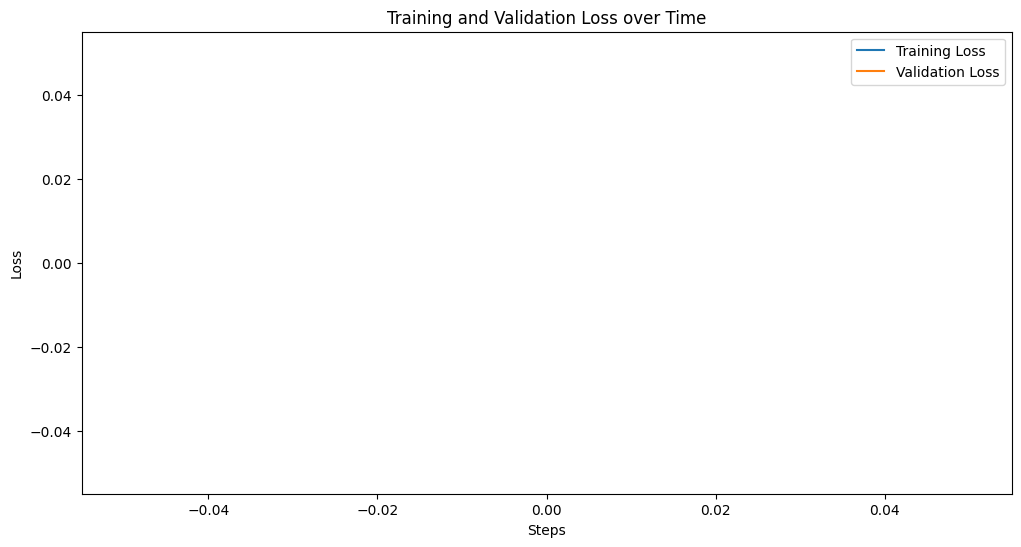

In [ ]:
from transformers import AutoTokenizer, DataCollatorWithPadding, AutoModelForSequenceClassification, TrainingArguments, Trainer
from transformers.trainer_callback import EarlyStoppingCallback
# from livelossplot import PlotLossesCallback

def train_bert():
    bert_tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")

    def bert_preprocess_function(examples):
        return bert_tokenizer(examples["dialogue"], truncation=True, padding=True)

    train_bert_tokenized_dataset = train_ds.map(bert_preprocess_function, batched=True)
    test_bert_tokenized_dataset = test_ds.map(bert_preprocess_function, batched=True)
    bert_data_collator = DataCollatorWithPadding(tokenizer=bert_tokenizer)

    id2label = {0: "NON-SCAM", 1: "SCAM"}
    label2id = {"NON-SCAM": 0, "SCAM": 1}

    model = AutoModelForSequenceClassification.from_pretrained(
        "google-bert/bert-base-uncased", num_labels=2, id2label=id2label, label2id=label2id
    )

    training_args = TrainingArguments(
        output_dir="bert-suspect-dialogue-scam-classifier-v1.0",
        learning_rate=2e-5,
        per_device_train_batch_size=8,
        per_device_eval_batch_size=8,
        num_train_epochs=10,
        weight_decay=0.01,
        eval_strategy="epoch",
        save_strategy="epoch",
        load_best_model_at_end=True,
        push_to_hub=True,
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_bert_tokenized_dataset,
        eval_dataset=test_bert_tokenized_dataset,
        tokenizer=bert_tokenizer,
        data_collator=bert_data_collator,
        compute_metrics=compute_metrics,
        callbacks=[
            PlotLossesCallback(),
            EarlyStoppingCallback(early_stopping_threshold=0.01, early_stopping_patience=2)
        ]
    )

    trainer.train()
    trainer.push_to_hub()

train_bert()

### Pytorch Model

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from transformers import AutoTokenizer, DataCollatorWithPadding
from datasets import load_dataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset from Hugging Face
dataset = load_dataset("BothBosu/single-agent-scam-conversations")
dataset = dataset.remove_columns("type")

# Apply the filter function to the dialogue column
def apply_filter(batch):
    batch["dialogue"] = [filter_suspect_dialogue(dialogue) for dialogue in batch["dialogue"]]
    return batch

dataset = dataset.map(apply_filter, batched=True)

# Tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Tokenize the dialogue column
def tokenize(batch):
    return tokenizer(batch["dialogue"], padding=True, truncation=True)

dataset = dataset.map(tokenize, batched=True)
dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

# Split the dataset into train and validation sets
train_dataset = dataset["train"]
val_dataset = dataset["test"]

data_collator  = DataCollatorWithPadding(tokenizer=tokenizer) #The collator rename the column label to labels

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, collate_fn=data_collator)
val_loader = DataLoader(val_dataset, batch_size=16, collate_fn=data_collator)

Map:   0%|          | 0/1280 [00:00<?, ? examples/s]

Map:   0%|          | 0/320 [00:00<?, ? examples/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/1280 [00:00<?, ? examples/s]

Map:   0%|          | 0/320 [00:00<?, ? examples/s]

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

def train_model(model, train_loader, val_loader, num_epochs, device, criterion, optimizer, patience=4, threshold=0.01):
    best_val_loss = None
    best_model = None
    train_losses = []
    val_losses = []
    epochs_no_improve = 0
    first_epoch = True

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for batch in train_loader:
            input_ids = batch["input_ids"].to(device)
            labels = batch["labels"].to(device)
            optimizer.zero_grad()
            outputs = model(input_ids)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        epoch_loss = running_loss / len(train_loader)
        train_losses.append(epoch_loss)
        print(f"Epoch [{epoch+1}/{num_epochs}], Training Loss: {epoch_loss:.4f}")

        model.eval()
        val_running_loss = 0.0
        true_labels = []
        predicted_labels = []
        with torch.no_grad():
            for batch in val_loader:
                input_ids = batch["input_ids"].to(device)
                labels = batch["labels"].to(device)
                outputs = model(input_ids)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                true_labels.extend(labels.cpu().numpy())
                predicted_labels.extend(predicted.cpu().numpy())
        val_loss = val_running_loss / len(val_loader)
        val_losses.append(val_loss)
        accuracy = accuracy_score(true_labels, predicted_labels)
        precision = precision_score(true_labels, predicted_labels)
        recall = recall_score(true_labels, predicted_labels)
        f1 = f1_score(true_labels, predicted_labels)
        print(f"Validation Loss: {val_loss:.4f}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

        if first_epoch or val_loss < best_val_loss - best_val_loss * threshold:
            best_val_loss = val_loss
            best_model = model
            epochs_no_improve = 0
            first_epoch = False
        else:
            epochs_no_improve += 1

        if epochs_no_improve >= patience:
            print(f"Early stopping triggered. No improvement in validation loss for {patience} consecutive epochs.")
            break

    # Plot training and validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
    plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    plt.show()

    return best_model, best_val_loss


Training Model 1
Epoch [1/16], Training Loss: 0.7166
Validation Loss: 0.6948, Accuracy: 0.5031, Precision: 1.0000, Recall: 0.0063, F1 Score: 0.0124
Epoch [2/16], Training Loss: 0.7009
Validation Loss: 0.6875, Accuracy: 0.5000, Precision: 0.5000, Recall: 1.0000, F1 Score: 0.6667
Epoch [3/16], Training Loss: 0.6138
Validation Loss: 0.6961, Accuracy: 0.5000, Precision: 0.5000, Recall: 1.0000, F1 Score: 0.6667
Epoch [4/16], Training Loss: 0.5303
Validation Loss: 0.3630, Accuracy: 0.8688, Precision: 0.8554, Recall: 0.8875, F1 Score: 0.8712
Epoch [5/16], Training Loss: 0.3611
Validation Loss: 0.3814, Accuracy: 0.8313, Precision: 0.9818, Recall: 0.6750, F1 Score: 0.8000
Epoch [6/16], Training Loss: 0.5178
Validation Loss: 0.2770, Accuracy: 0.9375, Precision: 0.9605, Recall: 0.9125, F1 Score: 0.9359
Epoch [7/16], Training Loss: 0.5711
Validation Loss: 0.2635, Accuracy: 0.9062, Precision: 0.9514, Recall: 0.8562, F1 Score: 0.9013
Epoch [8/16], Training Loss: 0.2797
Validation Loss: 0.3112, Accur

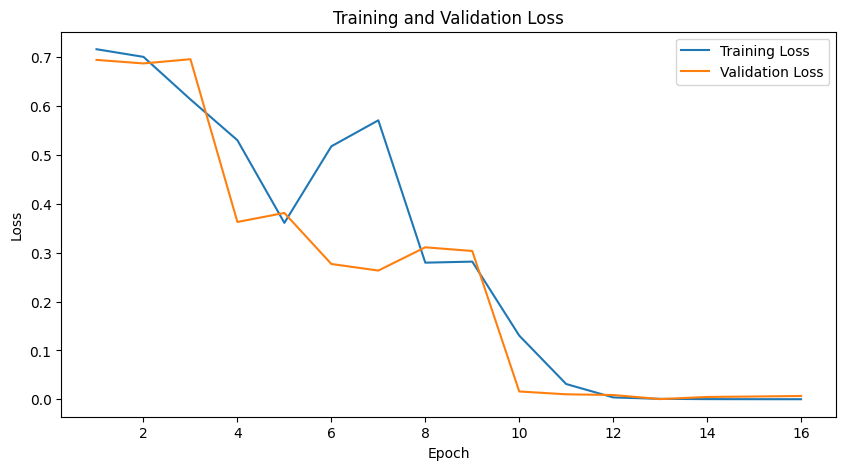

Training Model 2
Epoch [1/16], Training Loss: 0.7112
Validation Loss: 0.6933, Accuracy: 0.5031, Precision: 1.0000, Recall: 0.0063, F1 Score: 0.0124
Epoch [2/16], Training Loss: 0.6973
Validation Loss: 0.6953, Accuracy: 0.5031, Precision: 1.0000, Recall: 0.0063, F1 Score: 0.0124
Epoch [3/16], Training Loss: 0.6951
Validation Loss: 0.6924, Accuracy: 0.5031, Precision: 1.0000, Recall: 0.0063, F1 Score: 0.0124
Epoch [4/16], Training Loss: 0.6925
Validation Loss: 0.6777, Accuracy: 0.5000, Precision: 0.5000, Recall: 1.0000, F1 Score: 0.6667
Epoch [5/16], Training Loss: 0.6856


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Loss: 0.7007, Accuracy: 0.5000, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000
Epoch [6/16], Training Loss: 0.4695
Validation Loss: 0.2955, Accuracy: 0.8625, Precision: 0.8452, Recall: 0.8875, F1 Score: 0.8659
Epoch [7/16], Training Loss: 0.4143
Validation Loss: 0.3035, Accuracy: 0.8281, Precision: 0.9487, Recall: 0.6937, F1 Score: 0.8014
Epoch [8/16], Training Loss: 0.2299
Validation Loss: 0.1511, Accuracy: 0.9313, Precision: 0.8791, Recall: 1.0000, F1 Score: 0.9357
Epoch [9/16], Training Loss: 0.2263
Validation Loss: 0.2259, Accuracy: 0.9250, Precision: 0.8696, Recall: 1.0000, F1 Score: 0.9302
Epoch [10/16], Training Loss: 0.1728
Validation Loss: 0.1258, Accuracy: 0.9313, Precision: 0.9423, Recall: 0.9187, F1 Score: 0.9304
Epoch [11/16], Training Loss: 0.1431
Validation Loss: 0.1112, Accuracy: 0.9437, Precision: 0.9176, Recall: 0.9750, F1 Score: 0.9455
Epoch [12/16], Training Loss: 0.0920
Validation Loss: 0.0311, Accuracy: 0.9938, Precision: 0.9877, Recall: 1.0000, F1

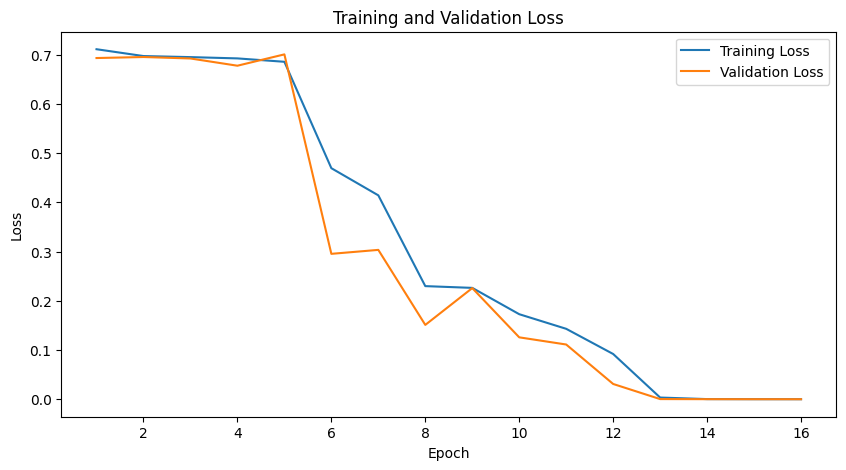

Training Model 3
Epoch [1/16], Training Loss: 0.7047
Validation Loss: 0.6998, Accuracy: 0.5000, Precision: 0.5000, Recall: 1.0000, F1 Score: 0.6667
Epoch [2/16], Training Loss: 0.6983
Validation Loss: 0.6913, Accuracy: 0.5000, Precision: 0.5000, Recall: 1.0000, F1 Score: 0.6667
Epoch [3/16], Training Loss: 0.7297
Validation Loss: 0.6705, Accuracy: 0.8375, Precision: 0.8034, Recall: 0.8938, F1 Score: 0.8462
Epoch [4/16], Training Loss: 0.7059
Validation Loss: 0.6994, Accuracy: 0.5000, Precision: 0.5000, Recall: 1.0000, F1 Score: 0.6667
Epoch [5/16], Training Loss: 0.7469
Validation Loss: 0.6657, Accuracy: 0.5000, Precision: 0.5000, Recall: 1.0000, F1 Score: 0.6667
Epoch [6/16], Training Loss: 0.6584
Validation Loss: 0.6031, Accuracy: 0.8375, Precision: 0.8034, Recall: 0.8938, F1 Score: 0.8462
Epoch [7/16], Training Loss: 0.4630
Validation Loss: 0.3260, Accuracy: 0.8906, Precision: 0.9032, Recall: 0.8750, F1 Score: 0.8889
Epoch [8/16], Training Loss: 0.3469
Validation Loss: 0.2755, Accur

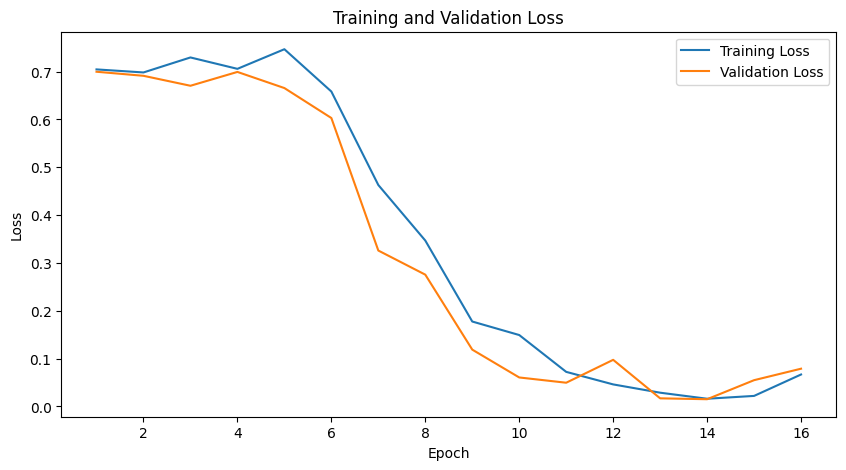

Training Model 4
Epoch [1/16], Training Loss: 0.7115
Validation Loss: 0.6977, Accuracy: 0.5031, Precision: 1.0000, Recall: 0.0063, F1 Score: 0.0124
Epoch [2/16], Training Loss: 0.6950
Validation Loss: 0.6651, Accuracy: 0.6312, Precision: 1.0000, Recall: 0.2625, F1 Score: 0.4158
Epoch [3/16], Training Loss: 0.3691
Validation Loss: 0.2295, Accuracy: 0.9250, Precision: 0.8696, Recall: 1.0000, F1 Score: 0.9302
Epoch [4/16], Training Loss: 0.2399
Validation Loss: 0.2042, Accuracy: 0.9250, Precision: 0.8696, Recall: 1.0000, F1 Score: 0.9302
Epoch [5/16], Training Loss: 0.2423
Validation Loss: 0.2022, Accuracy: 0.9250, Precision: 0.8696, Recall: 1.0000, F1 Score: 0.9302
Epoch [6/16], Training Loss: 0.2411
Validation Loss: 0.1982, Accuracy: 0.9250, Precision: 0.8696, Recall: 1.0000, F1 Score: 0.9302
Epoch [7/16], Training Loss: 0.2102
Validation Loss: 0.1889, Accuracy: 0.9250, Precision: 0.8696, Recall: 1.0000, F1 Score: 0.9302
Epoch [8/16], Training Loss: 0.2004
Validation Loss: 0.1834, Accur

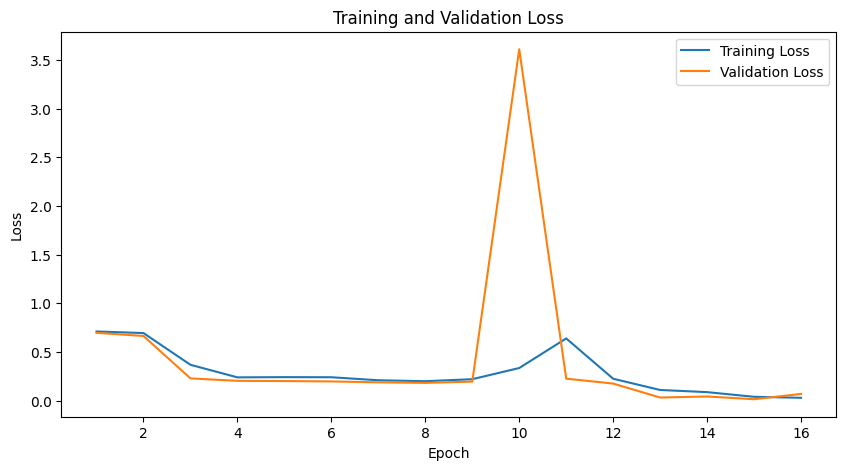

Training Model 5
Epoch [1/16], Training Loss: 0.7143
Validation Loss: 0.6966, Accuracy: 0.5031, Precision: 1.0000, Recall: 0.0063, F1 Score: 0.0124
Epoch [2/16], Training Loss: 0.6967
Validation Loss: 0.6935, Accuracy: 0.5031, Precision: 1.0000, Recall: 0.0063, F1 Score: 0.0124
Epoch [3/16], Training Loss: 0.6941
Validation Loss: 0.6936, Accuracy: 0.5000, Precision: 0.5000, Recall: 1.0000, F1 Score: 0.6667
Epoch [4/16], Training Loss: 0.6936
Validation Loss: 0.6940, Accuracy: 0.5031, Precision: 1.0000, Recall: 0.0063, F1 Score: 0.0124
Epoch [5/16], Training Loss: 0.6938
Validation Loss: 0.6942, Accuracy: 0.5031, Precision: 1.0000, Recall: 0.0063, F1 Score: 0.0124
Early stopping triggered. No improvement in validation loss for 4 consecutive epochs.


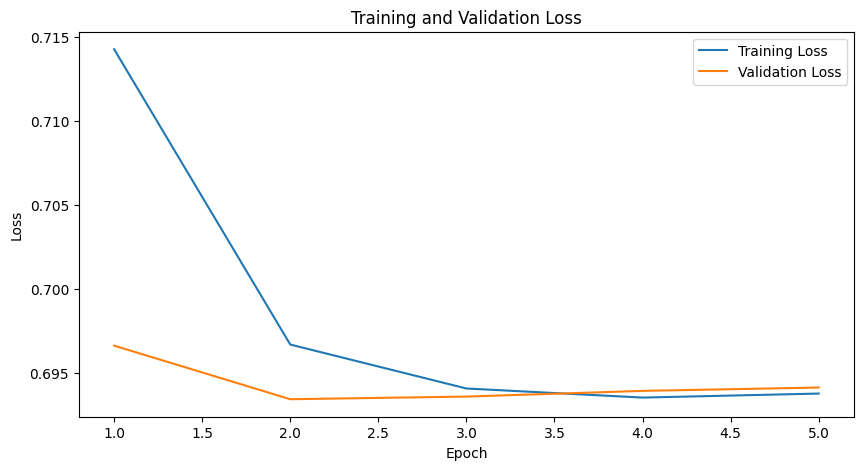

Training Model 6
Epoch [1/16], Training Loss: 0.7186
Validation Loss: 0.6951, Accuracy: 0.5031, Precision: 1.0000, Recall: 0.0063, F1 Score: 0.0124
Epoch [2/16], Training Loss: 0.6955
Validation Loss: 0.6943, Accuracy: 0.5000, Precision: 0.5000, Recall: 1.0000, F1 Score: 0.6667
Epoch [3/16], Training Loss: 0.6936
Validation Loss: 0.5452, Accuracy: 0.7531, Precision: 0.6723, Recall: 0.9875, F1 Score: 0.8000
Epoch [4/16], Training Loss: 0.6312
Validation Loss: 0.6779, Accuracy: 0.5031, Precision: 1.0000, Recall: 0.0063, F1 Score: 0.0124
Epoch [5/16], Training Loss: 0.5669
Validation Loss: 0.7406, Accuracy: 0.5000, Precision: 0.5000, Recall: 1.0000, F1 Score: 0.6667
Epoch [6/16], Training Loss: 0.3792
Validation Loss: 0.2132, Accuracy: 0.9031, Precision: 0.9057, Recall: 0.9000, F1 Score: 0.9028
Epoch [7/16], Training Loss: 0.1905
Validation Loss: 0.1233, Accuracy: 0.9469, Precision: 0.9231, Recall: 0.9750, F1 Score: 0.9483
Epoch [8/16], Training Loss: 0.1735
Validation Loss: 0.1781, Accur

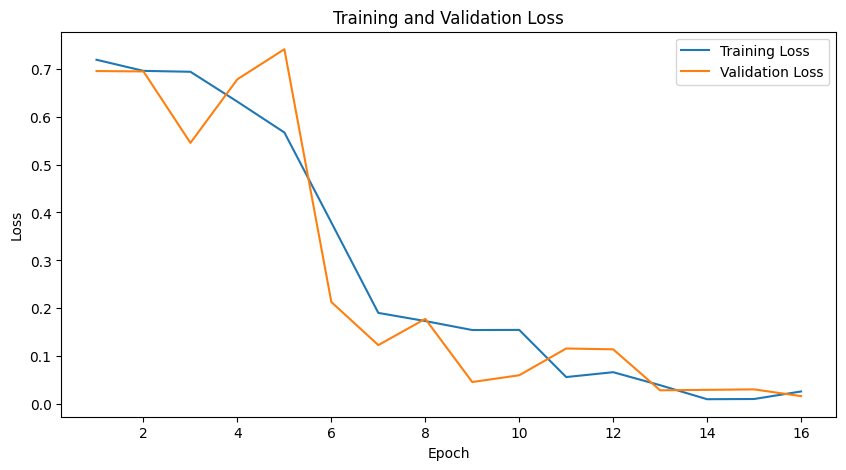

model.safetensors:   0%|          | 0.00/132M [00:00<?, ?B/s]

Best model pushed to the Hugging Face Hub successfully with validation loss: 0.00010831377840077039.


In [ ]:
import torch
import torch.nn as nn
from huggingface_hub import PyTorchModelHubMixin

# Define the LSTM model class
class LSTMClassifier(nn.Module, PyTorchModelHubMixin):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout, model_type="lstm"):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.lstm = nn.LSTM(hidden_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        embedded = self.embedding(x)
        output, _ = self.lstm(embedded)
        output = self.dropout(output[:, -1, :])
        output = self.fc(output)
        return output

# Set hyperparameters
input_size = tokenizer.vocab_size
hidden_size = 768
num_layers = 2
num_classes = 2
dropout = 0.2
num_epochs = 16
learning_rate = 0.001

# Train models
best_val_loss = float('inf')
best_model_state_dict = None

for model_num in range(6):
    print(f"Training Model {model_num + 1}")

    # Initialize the model
    model = LSTMClassifier(input_size, hidden_size, num_layers, num_classes, dropout)

    # Move the model to GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

    # Train the model
    model, val_loss = train_model(model, train_loader, val_loader, num_epochs, device, criterion, optimizer)

    # Check if the current model has the least validation loss
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state_dict = model.state_dict()

# Save and push the best model to the Hugging Face Hub
if best_model_state_dict is not None:
    torch.save(best_model_state_dict, "lstm-suspect-dialogue-scam-classifier-v1.0.pt")
    # Create a new instance of the best model
    best_model = LSTMClassifier(input_size, hidden_size, num_layers, num_classes, dropout)
    best_model.load_state_dict(best_model_state_dict)
    best_model.push_to_hub("lstm-suspect-dialogue-scam-classifier-v1.0")
    print(f"Best model pushed to the Hugging Face Hub successfully with validation loss: {best_val_loss}.")
else:
    print("No best model found.")

Training Model 1
Epoch [1/16], Training Loss: 0.7216
Validation Loss: 0.7012, Accuracy: 0.5000, Precision: 0.5000, Recall: 1.0000, F1 Score: 0.6667
Epoch [2/16], Training Loss: 0.6963
Validation Loss: 0.6941, Accuracy: 0.5000, Precision: 0.5000, Recall: 1.0000, F1 Score: 0.6667
Epoch [3/16], Training Loss: 0.6938
Validation Loss: 0.6910, Accuracy: 0.5031, Precision: 1.0000, Recall: 0.0063, F1 Score: 0.0124
Epoch [4/16], Training Loss: 0.6920
Validation Loss: 0.6903, Accuracy: 0.5000, Precision: 0.5000, Recall: 1.0000, F1 Score: 0.6667
Epoch [5/16], Training Loss: 0.5385
Validation Loss: 0.3884, Accuracy: 0.8375, Precision: 0.8034, Recall: 0.8938, F1 Score: 0.8462
Epoch [6/16], Training Loss: 0.4197
Validation Loss: 0.3958, Accuracy: 0.8344, Precision: 0.8023, Recall: 0.8875, F1 Score: 0.8427
Epoch [7/16], Training Loss: 0.4438
Validation Loss: 0.4131, Accuracy: 0.8344, Precision: 0.8023, Recall: 0.8875, F1 Score: 0.8427
Epoch [8/16], Training Loss: 0.4254
Validation Loss: 0.3768, Accur

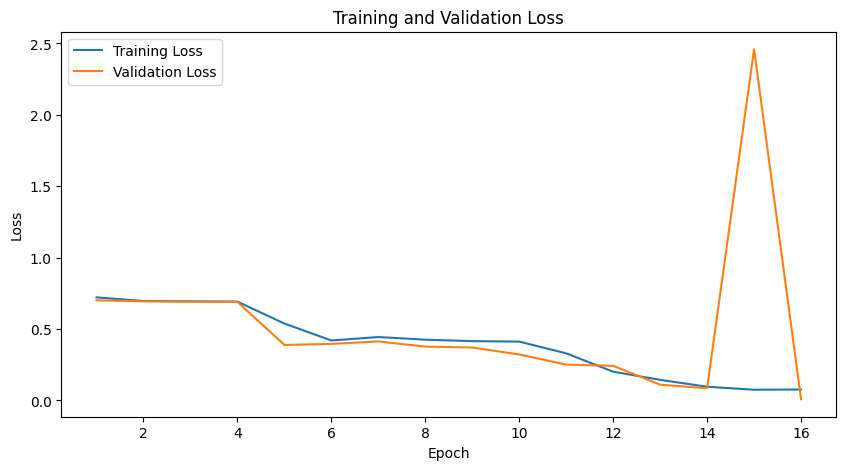

Training Model 2
Epoch [1/16], Training Loss: 0.7324
Validation Loss: 0.6933, Accuracy: 0.5031, Precision: 1.0000, Recall: 0.0063, F1 Score: 0.0124
Epoch [2/16], Training Loss: 0.6947
Validation Loss: 0.6914, Accuracy: 0.5031, Precision: 1.0000, Recall: 0.0063, F1 Score: 0.0124
Epoch [3/16], Training Loss: 0.6947
Validation Loss: 0.6899, Accuracy: 0.5062, Precision: 1.0000, Recall: 0.0125, F1 Score: 0.0247
Epoch [4/16], Training Loss: 0.4830
Validation Loss: 0.2463, Accuracy: 0.9000, Precision: 0.9051, Recall: 0.8938, F1 Score: 0.8994
Epoch [5/16], Training Loss: 0.2232
Validation Loss: 0.2047, Accuracy: 0.9375, Precision: 0.9023, Recall: 0.9812, F1 Score: 0.9401
Epoch [6/16], Training Loss: 0.2165
Validation Loss: 0.2005, Accuracy: 0.9250, Precision: 0.8696, Recall: 1.0000, F1 Score: 0.9302
Epoch [7/16], Training Loss: 0.5015
Validation Loss: 0.4447, Accuracy: 0.8438, Precision: 0.8929, Recall: 0.7812, F1 Score: 0.8333
Epoch [8/16], Training Loss: 0.3971
Validation Loss: 0.2774, Accur

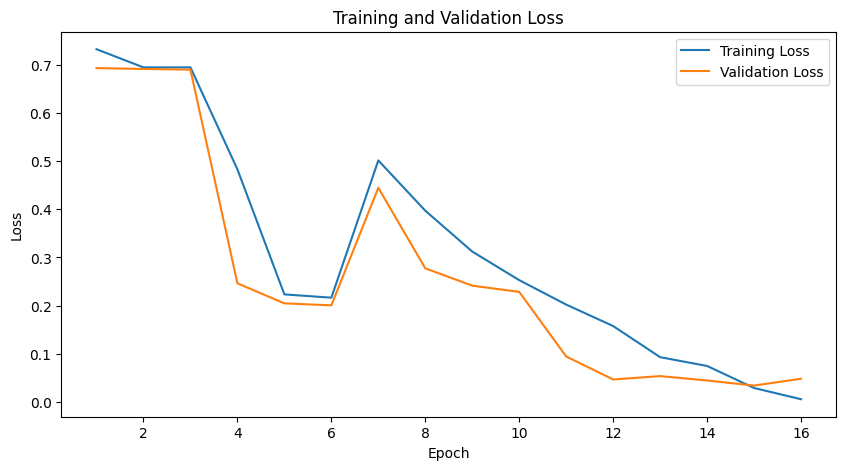

Training Model 3
Epoch [1/16], Training Loss: 0.7125
Validation Loss: 0.7174, Accuracy: 0.5000, Precision: 0.5000, Recall: 1.0000, F1 Score: 0.6667
Epoch [2/16], Training Loss: 0.7130
Validation Loss: 0.5452, Accuracy: 0.8500, Precision: 0.8373, Recall: 0.8688, F1 Score: 0.8528
Epoch [3/16], Training Loss: 0.3527
Validation Loss: 0.1845, Accuracy: 0.9000, Precision: 0.9051, Recall: 0.8938, F1 Score: 0.8994
Epoch [4/16], Training Loss: 0.1825
Validation Loss: 0.1602, Accuracy: 0.9125, Precision: 0.9231, Recall: 0.9000, F1 Score: 0.9114
Epoch [5/16], Training Loss: 0.1728
Validation Loss: 0.1369, Accuracy: 0.9313, Precision: 0.9726, Recall: 0.8875, F1 Score: 0.9281
Epoch [6/16], Training Loss: 0.1538
Validation Loss: 0.1264, Accuracy: 0.9250, Precision: 0.8696, Recall: 1.0000, F1 Score: 0.9302
Epoch [7/16], Training Loss: 0.1429
Validation Loss: 0.1223, Accuracy: 0.9281, Precision: 0.8743, Recall: 1.0000, F1 Score: 0.9329
Epoch [8/16], Training Loss: 0.1345
Validation Loss: 0.0951, Accur

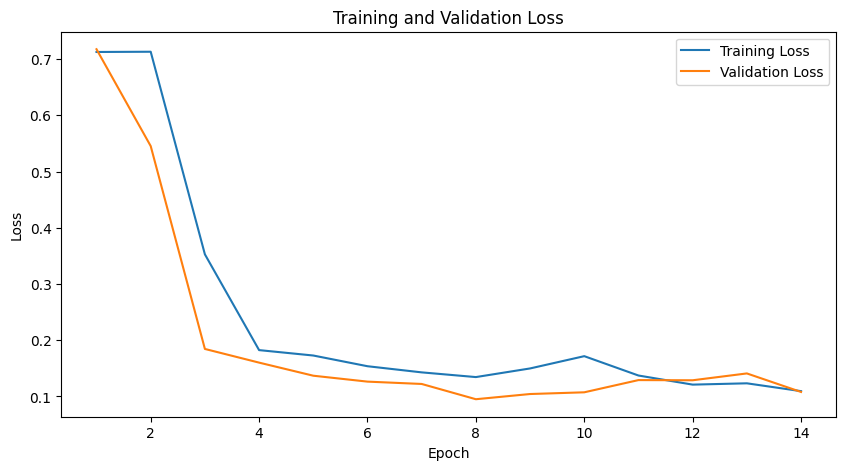

Training Model 4
Epoch [1/16], Training Loss: 0.7232
Validation Loss: 0.7025, Accuracy: 0.5031, Precision: 1.0000, Recall: 0.0063, F1 Score: 0.0124
Epoch [2/16], Training Loss: 0.6980
Validation Loss: 0.6913, Accuracy: 0.5062, Precision: 1.0000, Recall: 0.0125, F1 Score: 0.0247
Epoch [3/16], Training Loss: 0.4490
Validation Loss: 0.1990, Accuracy: 0.9375, Precision: 0.8889, Recall: 1.0000, F1 Score: 0.9412
Epoch [4/16], Training Loss: 0.4483
Validation Loss: 0.3400, Accuracy: 0.8875, Precision: 0.9493, Recall: 0.8187, F1 Score: 0.8792
Epoch [5/16], Training Loss: 0.1555
Validation Loss: 0.0157, Accuracy: 0.9969, Precision: 1.0000, Recall: 0.9938, F1 Score: 0.9969
Epoch [6/16], Training Loss: 0.0087
Validation Loss: 0.0041, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Epoch [7/16], Training Loss: 0.0058
Validation Loss: 0.0311, Accuracy: 0.9875, Precision: 0.9756, Recall: 1.0000, F1 Score: 0.9877
Epoch [8/16], Training Loss: 0.0116
Validation Loss: 0.0015, Accur

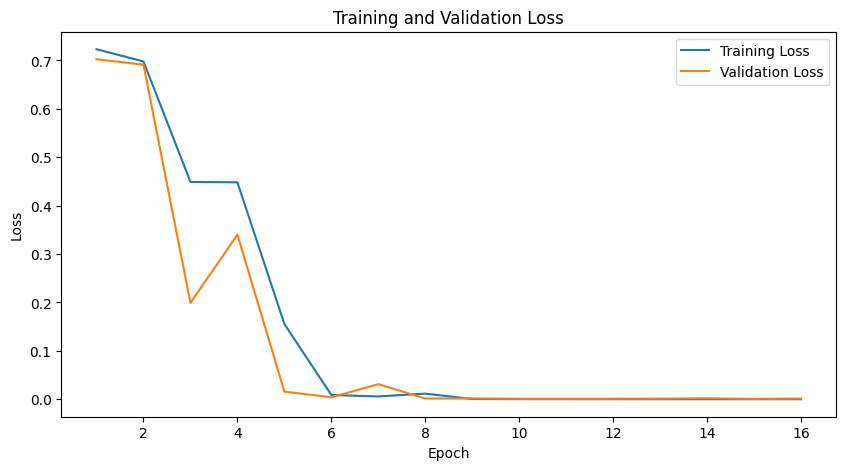

Training Model 5
Epoch [1/16], Training Loss: 0.7267
Validation Loss: 0.7117, Accuracy: 0.5000, Precision: 0.5000, Recall: 1.0000, F1 Score: 0.6667
Epoch [2/16], Training Loss: 0.7319
Validation Loss: 0.6401, Accuracy: 0.5000, Precision: 0.5000, Recall: 1.0000, F1 Score: 0.6667
Epoch [3/16], Training Loss: 0.3551
Validation Loss: 0.2046, Accuracy: 0.9344, Precision: 0.8840, Recall: 1.0000, F1 Score: 0.9384
Epoch [4/16], Training Loss: 0.2277
Validation Loss: 0.2054, Accuracy: 0.9031, Precision: 0.9057, Recall: 0.9000, F1 Score: 0.9028
Epoch [5/16], Training Loss: 0.2141
Validation Loss: 0.1772, Accuracy: 0.9250, Precision: 0.8696, Recall: 1.0000, F1 Score: 0.9302
Epoch [6/16], Training Loss: 0.1290
Validation Loss: 0.0307, Accuracy: 0.9906, Precision: 0.9816, Recall: 1.0000, F1 Score: 0.9907
Epoch [7/16], Training Loss: 0.0771
Validation Loss: 0.0023, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Epoch [8/16], Training Loss: 0.0054
Validation Loss: 0.0004, Accur

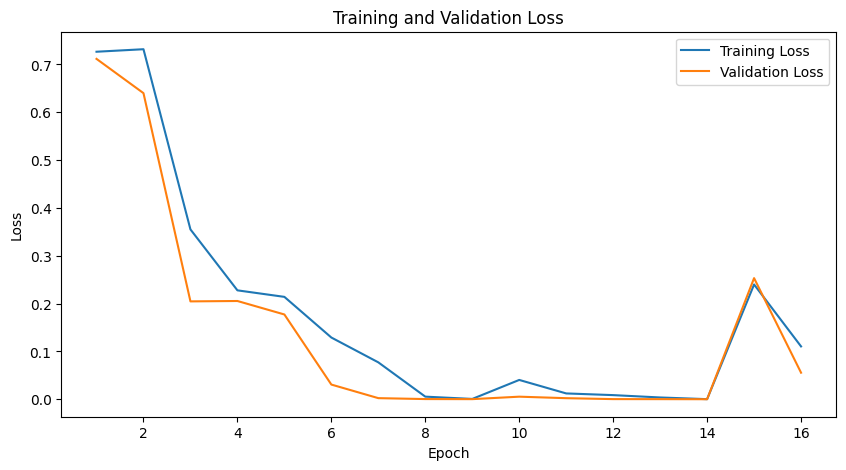

Training Model 6
Epoch [1/16], Training Loss: 0.7314
Validation Loss: 0.6926, Accuracy: 0.5031, Precision: 1.0000, Recall: 0.0063, F1 Score: 0.0124
Epoch [2/16], Training Loss: 0.5358
Validation Loss: 0.2271, Accuracy: 0.9000, Precision: 0.9051, Recall: 0.8938, F1 Score: 0.8994
Epoch [3/16], Training Loss: 0.2321
Validation Loss: 0.2012, Accuracy: 0.9031, Precision: 0.9057, Recall: 0.9000, F1 Score: 0.9028
Epoch [4/16], Training Loss: 0.2541
Validation Loss: 0.2403, Accuracy: 0.9281, Precision: 0.9006, Recall: 0.9625, F1 Score: 0.9305
Epoch [5/16], Training Loss: 0.2522
Validation Loss: 0.2468, Accuracy: 0.9250, Precision: 0.8696, Recall: 1.0000, F1 Score: 0.9302
Epoch [6/16], Training Loss: 0.2368
Validation Loss: 0.2615, Accuracy: 0.8969, Precision: 0.9045, Recall: 0.8875, F1 Score: 0.8959
Epoch [7/16], Training Loss: 0.2373
Validation Loss: 0.2187, Accuracy: 0.9250, Precision: 0.8696, Recall: 1.0000, F1 Score: 0.9302
Epoch [8/16], Training Loss: 0.2232
Validation Loss: 0.1851, Accur

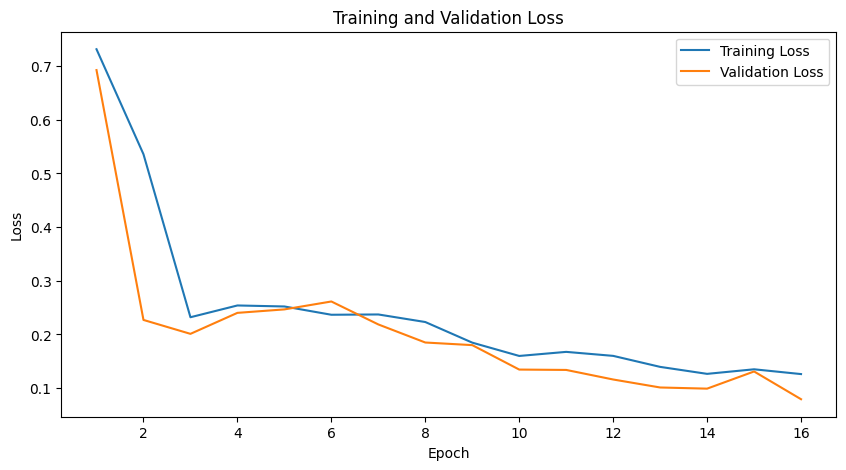

Training Model 7
Epoch [1/16], Training Loss: 0.7138
Validation Loss: 0.6919, Accuracy: 0.5000, Precision: 0.5000, Recall: 1.0000, F1 Score: 0.6667
Epoch [2/16], Training Loss: 0.7054
Validation Loss: 0.6957, Accuracy: 0.5000, Precision: 0.5000, Recall: 1.0000, F1 Score: 0.6667
Epoch [3/16], Training Loss: 0.6844
Validation Loss: 0.6927, Accuracy: 0.5031, Precision: 1.0000, Recall: 0.0063, F1 Score: 0.0124
Epoch [4/16], Training Loss: 0.6439
Validation Loss: 0.5542, Accuracy: 0.7438, Precision: 0.9756, Recall: 0.5000, F1 Score: 0.6612
Epoch [5/16], Training Loss: 0.4776
Validation Loss: 0.3974, Accuracy: 0.8531, Precision: 0.8424, Recall: 0.8688, F1 Score: 0.8554
Epoch [6/16], Training Loss: 0.3742
Validation Loss: 0.2435, Accuracy: 0.8812, Precision: 0.8910, Recall: 0.8688, F1 Score: 0.8797
Epoch [7/16], Training Loss: 0.1608
Validation Loss: 0.0453, Accuracy: 0.9875, Precision: 0.9937, Recall: 0.9812, F1 Score: 0.9874
Epoch [8/16], Training Loss: 0.0616
Validation Loss: 0.0307, Accur

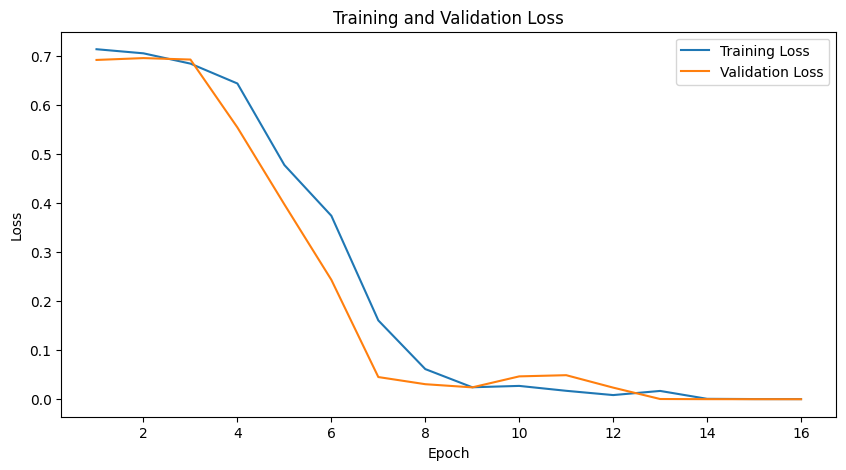

Training Model 8
Epoch [1/16], Training Loss: 0.7102
Validation Loss: 0.7007, Accuracy: 0.5031, Precision: 1.0000, Recall: 0.0063, F1 Score: 0.0124
Epoch [2/16], Training Loss: 0.6979
Validation Loss: 0.6941, Accuracy: 0.5031, Precision: 1.0000, Recall: 0.0063, F1 Score: 0.0124
Epoch [3/16], Training Loss: 0.6598
Validation Loss: 0.4671, Accuracy: 0.8375, Precision: 0.7935, Recall: 0.9125, F1 Score: 0.8488
Epoch [4/16], Training Loss: 0.3571
Validation Loss: 0.3363, Accuracy: 0.8594, Precision: 0.8363, Recall: 0.8938, F1 Score: 0.8640
Epoch [5/16], Training Loss: 0.2362
Validation Loss: 0.2770, Accuracy: 0.8875, Precision: 0.8370, Recall: 0.9625, F1 Score: 0.8953
Epoch [6/16], Training Loss: 0.1530
Validation Loss: 0.1431, Accuracy: 0.9406, Precision: 1.0000, Recall: 0.8812, F1 Score: 0.9369
Epoch [7/16], Training Loss: 0.1289
Validation Loss: 0.1547, Accuracy: 0.9500, Precision: 1.0000, Recall: 0.9000, F1 Score: 0.9474
Epoch [8/16], Training Loss: 0.1701
Validation Loss: 0.4942, Accur

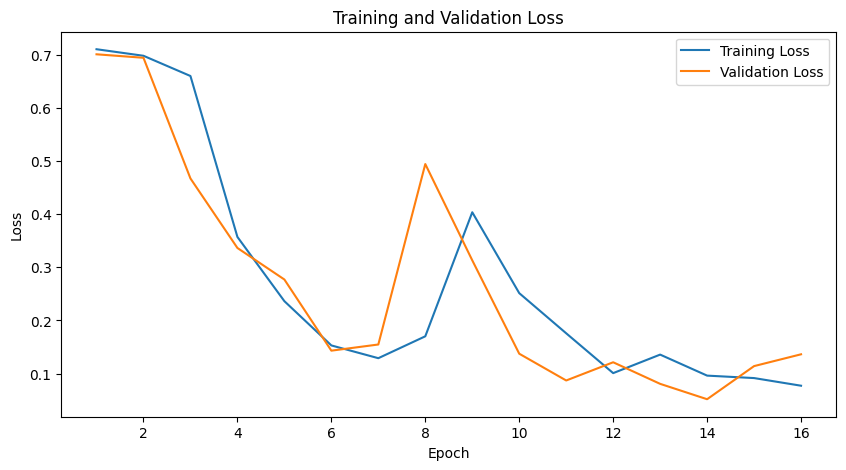

model.safetensors:   0%|          | 0.00/188M [00:00<?, ?B/s]

Best model pushed to the Hugging Face Hub successfully with validation loss: 3.794041498395018e-05.


In [ ]:
from huggingface_hub import PyTorchModelHubMixin
# Define the LSTM model class
class BiLSTMClassifier(nn.Module, PyTorchModelHubMixin):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout):
        super(BiLSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.lstm = nn.LSTM(hidden_size, hidden_size, num_layers, batch_first=True, bidirectional=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size * 2, num_classes)  # Multiply hidden_size by 2 for BiLSTM
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        embedded = self.embedding(x)
        output, _ = self.lstm(embedded)
        output = self.dropout(output[:, -1, :])
        output = self.fc(output)
        return output

# Set hyperparameters
input_size = tokenizer.vocab_size
hidden_size = 768
num_layers = 2
num_classes = 2
dropout = 0.2
num_epochs = 16
learning_rate = 0.001

# Initialize variables to track the best model based on validation loss
best_val_loss = float('inf')
best_model_state_dict = None

# Train models
for model_num in range(8):
    print(f"Training Model {model_num + 1}")

    # Initialize the model
    model = BiLSTMClassifier(input_size, hidden_size, num_layers, num_classes, dropout)

    # Move the model to GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=learning_rate)

    # Train the model
    model, val_loss = train_model(model, train_loader, val_loader, num_epochs, device, criterion, optimizer, patience=6)

    # Check if the current model has the least validation loss
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state_dict = model.state_dict()

# Save and push the best model to the Hugging Face Hub
if best_model_state_dict is not None:
    torch.save(best_model_state_dict, "bilstm-suspect-dialogue-scam-classifier-v1.0.pt")
    # Create a new instance of the best model
    best_model = BiLSTMClassifier(input_size, hidden_size, num_layers, num_classes, dropout)
    best_model.load_state_dict(best_model_state_dict)
    best_model.push_to_hub("bilstm-suspect-dialogue-scam-classifier-v1.0")
    print(f"Best model pushed to the Hugging Face Hub successfully with validation loss: {best_val_loss}.")
else:
    print("No best model found.")

Training Model 1
Epoch [1/16], Training Loss: 0.4897
Validation Loss: 0.2640, Accuracy: 0.8688, Precision: 0.9758, Recall: 0.7562, F1 Score: 0.8521
Epoch [2/16], Training Loss: 0.1191
Validation Loss: 0.0635, Accuracy: 0.9781, Precision: 1.0000, Recall: 0.9563, F1 Score: 0.9776
Epoch [3/16], Training Loss: 0.0348
Validation Loss: 0.0117, Accuracy: 0.9969, Precision: 0.9938, Recall: 1.0000, F1 Score: 0.9969
Epoch [4/16], Training Loss: 0.0055
Validation Loss: 0.0005, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Epoch [5/16], Training Loss: 0.0006
Validation Loss: 0.0003, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Epoch [6/16], Training Loss: 0.0002
Validation Loss: 0.0002, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Epoch [7/16], Training Loss: 0.0001
Validation Loss: 0.0001, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Epoch [8/16], Training Loss: 0.0001
Validation Loss: 0.0001, Accur

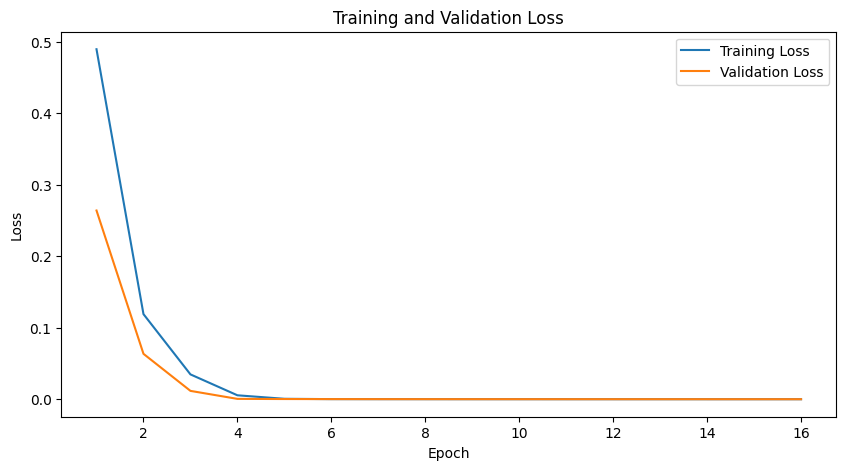

Training Model 2
Epoch [1/16], Training Loss: 0.4935
Validation Loss: 0.3718, Accuracy: 0.8656, Precision: 0.7910, Recall: 0.9938, F1 Score: 0.8809
Epoch [2/16], Training Loss: 0.1830
Validation Loss: 0.0691, Accuracy: 0.9594, Precision: 0.9249, Recall: 1.0000, F1 Score: 0.9610
Epoch [3/16], Training Loss: 0.0208
Validation Loss: 0.0370, Accuracy: 0.9844, Precision: 0.9936, Recall: 0.9750, F1 Score: 0.9842
Epoch [4/16], Training Loss: 0.0891
Validation Loss: 0.0207, Accuracy: 0.9938, Precision: 0.9877, Recall: 1.0000, F1 Score: 0.9938
Epoch [5/16], Training Loss: 0.0081
Validation Loss: 0.0024, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Epoch [6/16], Training Loss: 0.0003
Validation Loss: 0.0006, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Epoch [7/16], Training Loss: 0.0002
Validation Loss: 0.0003, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Epoch [8/16], Training Loss: 0.0013
Validation Loss: 0.0007, Accur

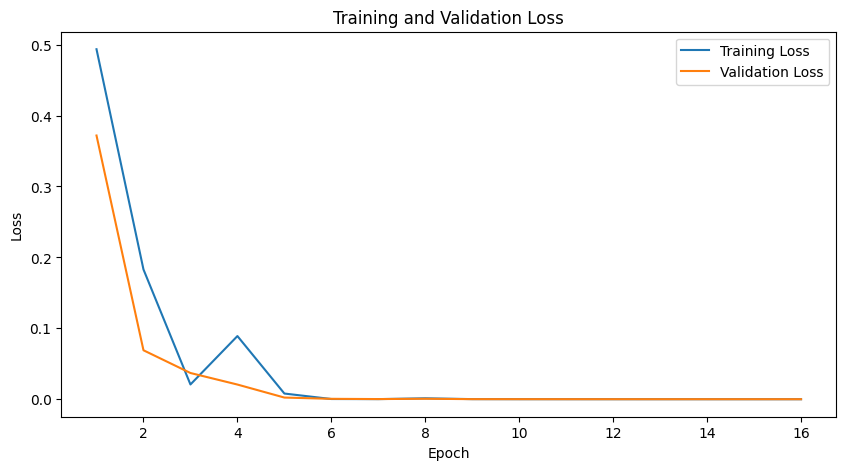

Training Model 3
Epoch [1/16], Training Loss: 0.4896
Validation Loss: 0.1267, Accuracy: 0.9563, Precision: 0.9506, Recall: 0.9625, F1 Score: 0.9565
Epoch [2/16], Training Loss: 0.0723
Validation Loss: 0.0306, Accuracy: 0.9938, Precision: 0.9877, Recall: 1.0000, F1 Score: 0.9938
Epoch [3/16], Training Loss: 0.0487
Validation Loss: 0.2443, Accuracy: 0.9062, Precision: 0.9851, Recall: 0.8250, F1 Score: 0.8980
Epoch [4/16], Training Loss: 0.0268
Validation Loss: 0.0008, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Epoch [5/16], Training Loss: 0.0003
Validation Loss: 0.0005, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Epoch [6/16], Training Loss: 0.0002
Validation Loss: 0.0004, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Epoch [7/16], Training Loss: 0.0001
Validation Loss: 0.0002, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Epoch [8/16], Training Loss: 0.0001
Validation Loss: 0.0001, Accur

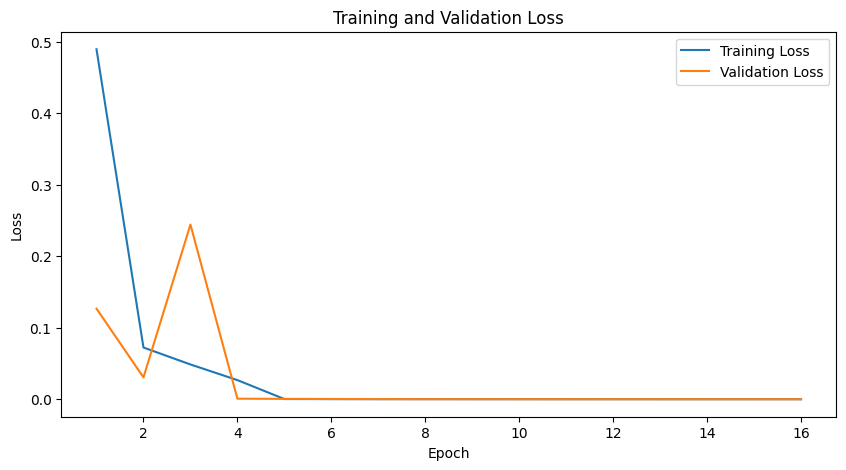

Training Model 4
Epoch [1/16], Training Loss: 0.5109
Validation Loss: 0.2339, Accuracy: 0.9219, Precision: 0.8902, Recall: 0.9625, F1 Score: 0.9249
Epoch [2/16], Training Loss: 0.1257
Validation Loss: 0.1047, Accuracy: 0.9656, Precision: 0.9357, Recall: 1.0000, F1 Score: 0.9668
Epoch [3/16], Training Loss: 0.1223
Validation Loss: 0.0329, Accuracy: 0.9875, Precision: 0.9875, Recall: 0.9875, F1 Score: 0.9875
Epoch [4/16], Training Loss: 0.0101
Validation Loss: 0.0096, Accuracy: 0.9969, Precision: 0.9938, Recall: 1.0000, F1 Score: 0.9969
Epoch [5/16], Training Loss: 0.0123
Validation Loss: 0.0059, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Epoch [6/16], Training Loss: 0.0025
Validation Loss: 0.0011, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Epoch [7/16], Training Loss: 0.0003
Validation Loss: 0.0004, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Epoch [8/16], Training Loss: 0.0002
Validation Loss: 0.0003, Accur

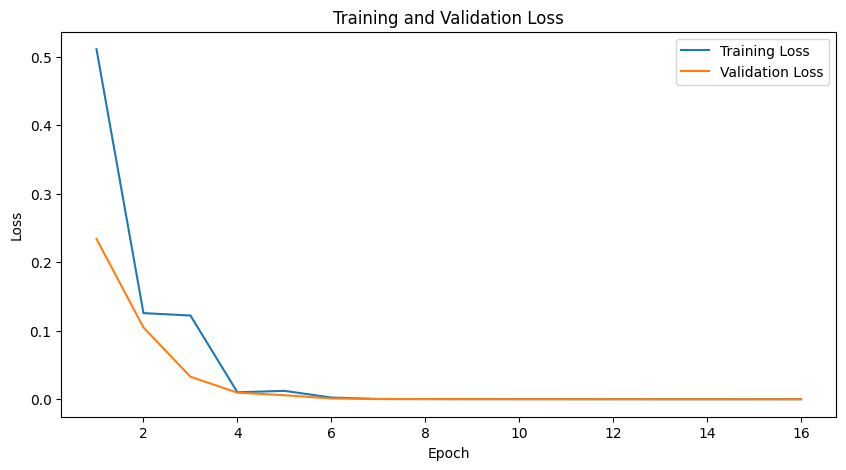

Training Model 5
Epoch [1/16], Training Loss: 0.4745
Validation Loss: 0.1686, Accuracy: 0.9594, Precision: 0.9401, Recall: 0.9812, F1 Score: 0.9602
Epoch [2/16], Training Loss: 0.3827
Validation Loss: 0.3271, Accuracy: 0.8500, Precision: 0.9746, Recall: 0.7188, F1 Score: 0.8273
Epoch [3/16], Training Loss: 0.0854
Validation Loss: 0.0060, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Epoch [4/16], Training Loss: 0.0045
Validation Loss: 0.0056, Accuracy: 0.9969, Precision: 0.9938, Recall: 1.0000, F1 Score: 0.9969
Epoch [5/16], Training Loss: 0.0004
Validation Loss: 0.0002, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Epoch [6/16], Training Loss: 0.0002
Validation Loss: 0.0001, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Epoch [7/16], Training Loss: 0.0001
Validation Loss: 0.0001, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Epoch [8/16], Training Loss: 0.0001
Validation Loss: 0.0001, Accur

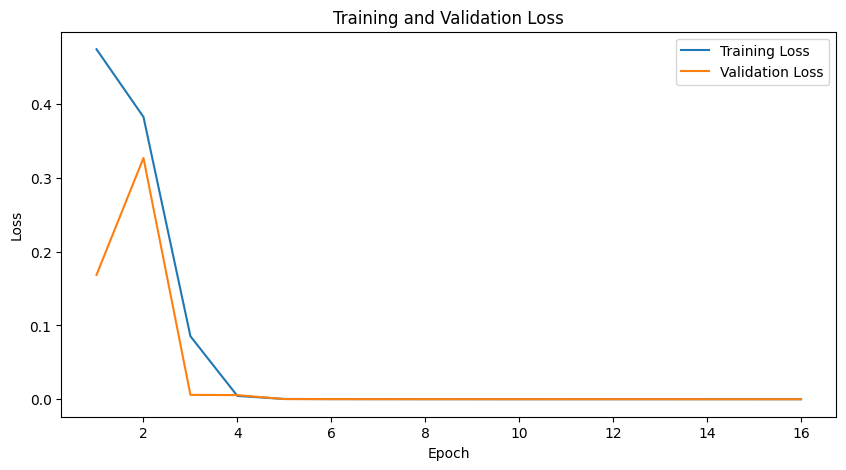

Training Model 6
Epoch [1/16], Training Loss: 0.4759
Validation Loss: 0.1665, Accuracy: 0.9344, Precision: 0.9017, Recall: 0.9750, F1 Score: 0.9369
Epoch [2/16], Training Loss: 0.0802
Validation Loss: 0.0063, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Epoch [3/16], Training Loss: 0.0020
Validation Loss: 0.0054, Accuracy: 0.9969, Precision: 0.9938, Recall: 1.0000, F1 Score: 0.9969
Epoch [4/16], Training Loss: 0.0488
Validation Loss: 0.0413, Accuracy: 0.9906, Precision: 1.0000, Recall: 0.9812, F1 Score: 0.9905
Epoch [5/16], Training Loss: 0.0708
Validation Loss: 0.0010, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Epoch [6/16], Training Loss: 0.0053
Validation Loss: 0.0315, Accuracy: 0.9969, Precision: 0.9938, Recall: 1.0000, F1 Score: 0.9969
Epoch [7/16], Training Loss: 0.0008
Validation Loss: 0.0002, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Epoch [8/16], Training Loss: 0.0249
Validation Loss: 0.0590, Accur

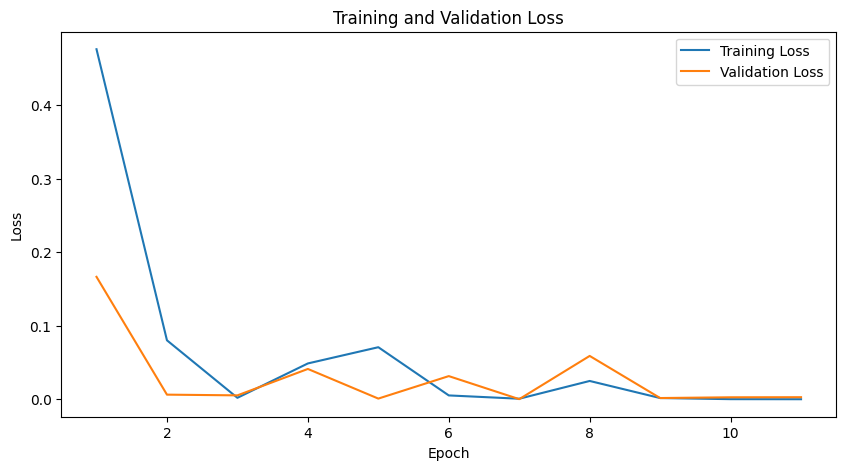

model.safetensors:   0%|          | 0.00/122M [00:00<?, ?B/s]

Best model pushed to the Hugging Face Hub successfully with validation loss: 3.171327207383001e-05.


In [ ]:
from huggingface_hub import PyTorchModelHubMixin

# Define the GRU model class
class GRUClassifier(nn.Module, PyTorchModelHubMixin):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout):
        super(GRUClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        embedded = self.embedding(x)
        output, _ = self.gru(embedded)
        output = self.dropout(output[:, -1, :])
        output = self.fc(output)
        return output

# Set hyperparameters
input_size = tokenizer.vocab_size
hidden_size = 768
num_layers = 2
num_classes = 2
dropout = 0.2
num_epochs = 16
learning_rate = 0.001

# Initialize variables to track the best model based on validation loss
best_val_loss = float('inf')
best_model_state_dict = None

# Train models
for model_num in range(6):
    print(f"Training Model {model_num + 1}")

    # Initialize the model
    model = GRUClassifier(input_size, hidden_size, num_layers, num_classes, dropout)

    # Move the model to GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=learning_rate)

    # Train the model
    model, val_loss = train_model(model, train_loader, val_loader, num_epochs, device, criterion, optimizer)

    # Check if the current model has the least validation loss
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state_dict = model.state_dict()

# Save and push the best model to the Hugging Face Hub
if best_model_state_dict is not None:
    torch.save(best_model_state_dict, "gru-suspect-dialogue-scam-classifier-v1.0.pt")
    # Create a new instance of the best model
    best_model = GRUClassifier(input_size, hidden_size, num_layers, num_classes, dropout)
    best_model.load_state_dict(best_model_state_dict)
    best_model.push_to_hub("gru-suspect-dialogue-scam-classifier-v1.0")
    print(f"Best model pushed to the Hugging Face Hub successfully with validation loss: {best_val_loss}.")
else:
    print("No best model found.")

Training Model 1
Epoch [1/16], Training Loss: 0.4839
Validation Loss: 0.0286, Accuracy: 0.9969, Precision: 0.9938, Recall: 1.0000, F1 Score: 0.9969
Epoch [2/16], Training Loss: 0.0079
Validation Loss: 0.0024, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Epoch [3/16], Training Loss: 0.0044
Validation Loss: 0.0015, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Epoch [4/16], Training Loss: 0.0009
Validation Loss: 0.0006, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Epoch [5/16], Training Loss: 0.0005
Validation Loss: 0.0004, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Epoch [6/16], Training Loss: 0.0004
Validation Loss: 0.0003, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Epoch [7/16], Training Loss: 0.0003
Validation Loss: 0.0002, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Epoch [8/16], Training Loss: 0.0002
Validation Loss: 0.0002, Accur

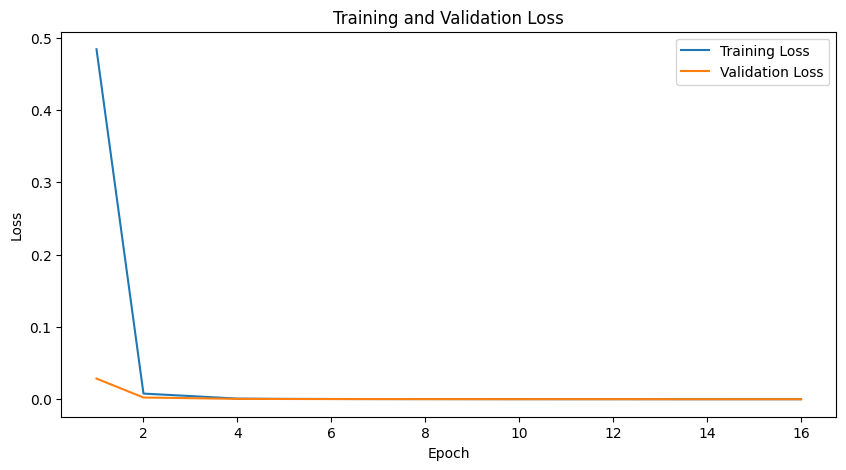

Training Model 2
Epoch [1/16], Training Loss: 0.4177
Validation Loss: 0.1000, Accuracy: 0.9688, Precision: 0.9573, Recall: 0.9812, F1 Score: 0.9691
Epoch [2/16], Training Loss: 0.1300
Validation Loss: 0.0650, Accuracy: 0.9812, Precision: 1.0000, Recall: 0.9625, F1 Score: 0.9809
Epoch [3/16], Training Loss: 0.0142
Validation Loss: 0.0216, Accuracy: 0.9906, Precision: 0.9816, Recall: 1.0000, F1 Score: 0.9907
Epoch [4/16], Training Loss: 0.0028
Validation Loss: 0.0040, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Epoch [5/16], Training Loss: 0.0010
Validation Loss: 0.0219, Accuracy: 0.9906, Precision: 0.9816, Recall: 1.0000, F1 Score: 0.9907
Epoch [6/16], Training Loss: 0.0001
Validation Loss: 0.0187, Accuracy: 0.9906, Precision: 0.9816, Recall: 1.0000, F1 Score: 0.9907
Epoch [7/16], Training Loss: 0.0001
Validation Loss: 0.0181, Accuracy: 0.9906, Precision: 0.9816, Recall: 1.0000, F1 Score: 0.9907
Epoch [8/16], Training Loss: 0.0001
Validation Loss: 0.0175, Accur

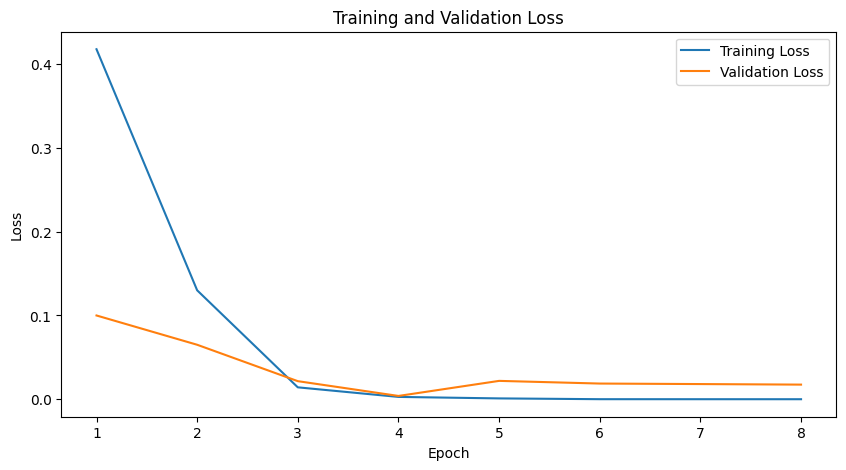

model.safetensors:   0%|          | 0.00/165M [00:00<?, ?B/s]

Best model pushed to the Hugging Face Hub successfully with validation loss: 5.628364961012267e-05.


In [ ]:
from huggingface_hub import PyTorchModelHubMixin

# Define the BiGRU model class
class BiGRUClassifier(nn.Module, PyTorchModelHubMixin):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout):
        super(BiGRUClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size, num_layers, batch_first=True, bidirectional=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size * 2, num_classes)  # Multiply hidden_size by 2 for BiGRU
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        embedded = self.embedding(x)
        output, _ = self.gru(embedded)
        output = self.dropout(output[:, -1, :])
        output = self.fc(output)
        return output

# Set hyperparameters
input_size = tokenizer.vocab_size
hidden_size = 768
num_layers = 2
num_classes = 2
dropout = 0.2
num_epochs = 16
learning_rate = 0.001

# Initialize variables to track the best model based on validation loss
best_val_loss = float('inf')
best_model_state_dict = None

# Train models
for model_num in range(2):
    print(f"Training Model {model_num + 1}")

    # Initialize the model
    model = BiGRUClassifier(input_size, hidden_size, num_layers, num_classes, dropout)

    # Move the model to GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=learning_rate)

    # Train the model
    model, val_loss = train_model(model, train_loader, val_loader, num_epochs, device, criterion, optimizer)

    # Check if the current model has the least validation loss
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state_dict = model.state_dict()

# Save and push the best model to the Hugging Face Hub
if best_model_state_dict is not None:
    torch.save(best_model_state_dict, "bigru-suspect-dialogue-scam-classifier-v1.0.pt")
    # Create a new instance of the best model
    best_model = BiGRUClassifier(input_size, hidden_size, num_layers, num_classes, dropout)
    best_model.load_state_dict(best_model_state_dict)
    best_model.push_to_hub("bigru-suspect-dialogue-scam-classifier-v1.0")
    print(f"Best model pushed to the Hugging Face Hub successfully with validation loss: {best_val_loss}.")
else:
    print("No best model found.")

Training Model 1
Epoch [1/16], Training Loss: 0.1022
Validation Loss: 0.0049, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Epoch [2/16], Training Loss: 0.0028
Validation Loss: 0.0016, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Epoch [3/16], Training Loss: 0.0014
Validation Loss: 0.0009, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Epoch [4/16], Training Loss: 0.0011
Validation Loss: 0.0006, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Epoch [5/16], Training Loss: 0.0005
Validation Loss: 0.0004, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Epoch [6/16], Training Loss: 0.0004
Validation Loss: 0.0003, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Epoch [7/16], Training Loss: 0.0002
Validation Loss: 0.0002, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Epoch [8/16], Training Loss: 0.0002
Validation Loss: 0.0002, Accur

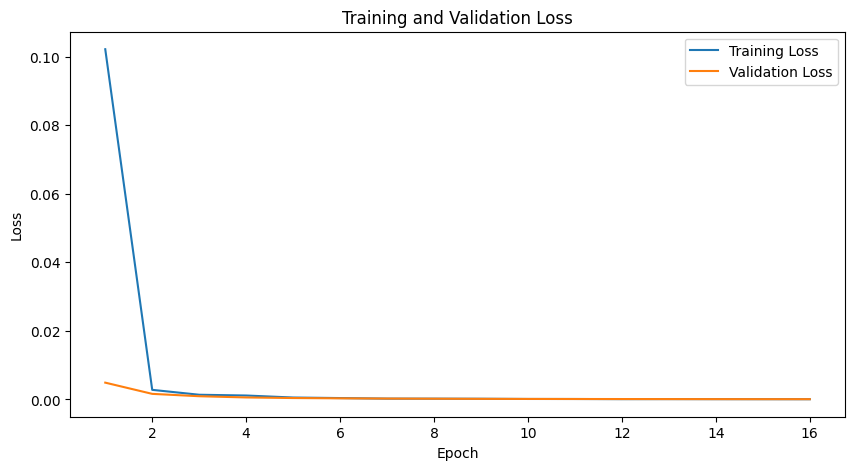

Training Model 2
Epoch [1/16], Training Loss: 0.0986
Validation Loss: 0.0057, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Epoch [2/16], Training Loss: 0.0036
Validation Loss: 0.0030, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Epoch [3/16], Training Loss: 0.0020
Validation Loss: 0.0015, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Epoch [4/16], Training Loss: 0.0010
Validation Loss: 0.0011, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Epoch [5/16], Training Loss: 0.0006
Validation Loss: 0.0008, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Epoch [6/16], Training Loss: 0.0006
Validation Loss: 0.0006, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Epoch [7/16], Training Loss: 0.0003
Validation Loss: 0.0005, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Epoch [8/16], Training Loss: 0.0002
Validation Loss: 0.0004, Accur

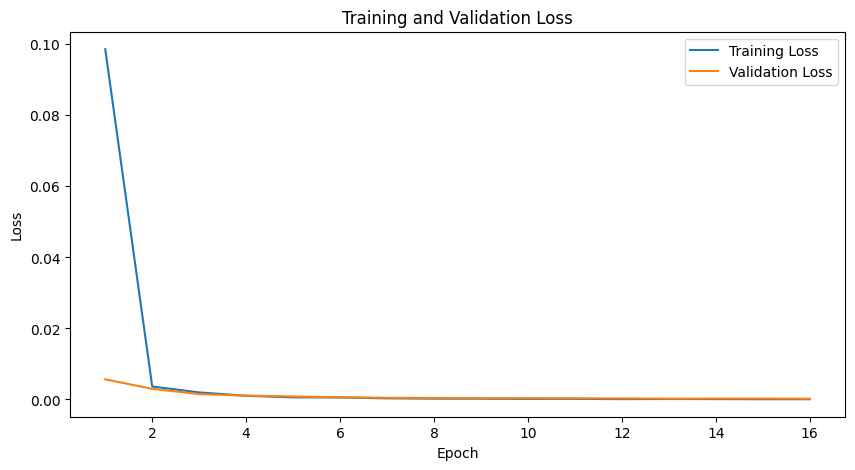

model.safetensors:   0%|          | 0.00/16.4M [00:00<?, ?B/s]

Best model pushed to the Hugging Face Hub successfully with validation loss: 6.743858662048297e-05.


In [ ]:
from huggingface_hub import PyTorchModelHubMixin
import torch.nn.functional as F

# Define the CNN model class
class CNNClassifier(nn.Module, PyTorchModelHubMixin):
    def __init__(self, vocab_size, embedding_dim, num_filters, filter_sizes, num_classes, dropout):
        super(CNNClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.convs = nn.ModuleList([
            nn.Conv1d(in_channels=embedding_dim, out_channels=num_filters, kernel_size=fs) for fs in filter_sizes
        ])
        self.fc = nn.Linear(len(filter_sizes) * num_filters, num_classes)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        embedded = self.embedding(x)
        embedded = embedded.permute(0, 2, 1)
        conved = [F.relu(conv(embedded)) for conv in self.convs]
        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]
        cat = self.dropout(torch.cat(pooled, dim=1))
        output = self.fc(cat)
        return output

# Set hyperparameters
vocab_size = tokenizer.vocab_size
embedding_dim = 128
num_filters = 128
filter_sizes = [3, 4, 5]
num_classes = 2
dropout = 0.2
num_epochs = 16
learning_rate = 0.001

# Initialize variables to track the best model based on validation loss
best_val_loss = float('inf')
best_model_state_dict = None

# Train models
for model_num in range(2):
    print(f"Training Model {model_num + 1}")

    # Initialize the model
    model = CNNClassifier(vocab_size, embedding_dim, num_filters, filter_sizes, num_classes, dropout)

    # Move the model to GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=learning_rate)

    # Train the model
    model, val_loss = train_model(model, train_loader, val_loader, num_epochs, device, criterion, optimizer)

    # Check if the current model has the least validation loss
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state_dict = model.state_dict()

# Save and push the best model to the Hugging Face Hub
if best_model_state_dict is not None:
    torch.save(best_model_state_dict, "cnn-suspect-dialogue-scam-classifier-v1.0.pt")

    # Create a new instance of the best model
    best_model = CNNClassifier(vocab_size, embedding_dim, num_filters, filter_sizes, num_classes, dropout)
    best_model.load_state_dict(best_model_state_dict)
    best_model.push_to_hub("cnn-suspect-dialogue-scam-classifier-v1.0")
    print(f"Best model pushed to the Hugging Face Hub successfully with validation loss: {best_val_loss}.")
else:
    print("No best model found.")

### Evaluation

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/1280 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/320 [00:00<?, ? examples/s]

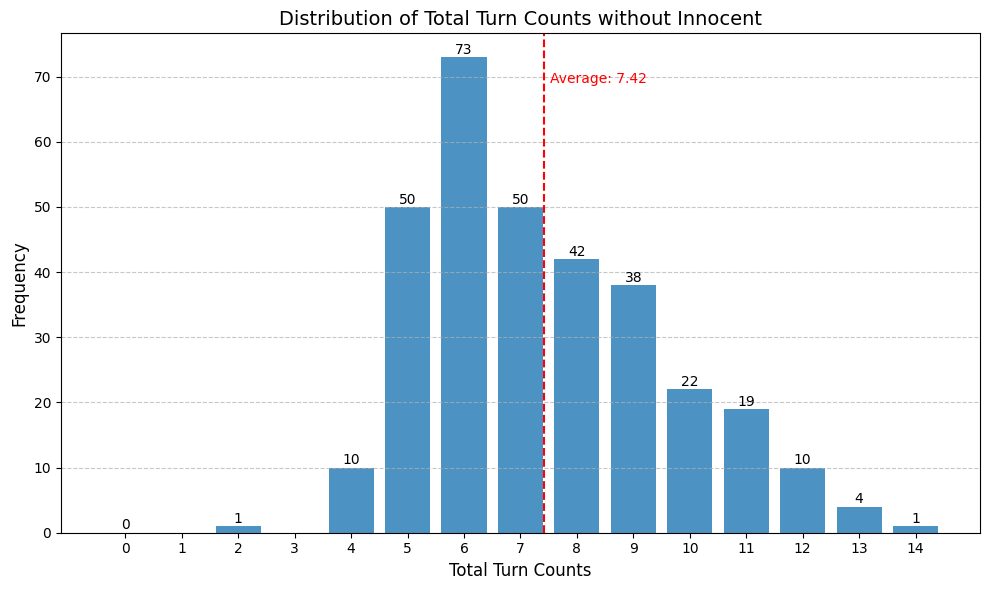

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datasets import load_dataset, Dataset

dataset = load_dataset("BothBosu/single-agent-scam-conversations")
dataset = dataset.remove_columns("type")

train_dataset = dataset["train"]
test_dataset = dataset["test"]
train_df = train_dataset.to_pandas()
test_df = test_dataset.to_pandas()

# Count the occurrences of "Suspect:"
test_df['Suspect_turns'] = test_df['dialogue'].str.count('Suspect:')

# Compute the total turns of "Suspect:"
test_df['total_turns'] = test_df['Suspect_turns']

# Function to filter only the Suspect's dialogue and remove the 'Suspect:' string
def filter_Suspect_dialogue(dialogue):
    parts = dialogue.split(' ')
    Suspect_dialogue = []
    is_Suspect = False
    for part in parts:
        if part.startswith('Suspect:'):
            is_Suspect = True
        elif part.startswith('Innocent:'):
            is_Suspect = False
        if is_Suspect:
            Suspect_dialogue.append(part)
    return ' '.join(Suspect_dialogue).strip()

# Apply the function to the DataFrame
train_df['dialogue'] = train_df['dialogue'].apply(filter_Suspect_dialogue)
test_df['dialogue'] = test_df['dialogue'].apply(filter_Suspect_dialogue)

# Create a histogram of the total turns distribution
plt.figure(figsize=(10, 6))

# Calculate the frequency of each total turn count
turn_counts_frequency = test_df['total_turns'].value_counts().sort_index()

# Create a DataFrame with 'Total Turn Counts' and 'Frequency' columns
mode_turns = pd.DataFrame({'Total Turn Counts': turn_counts_frequency.index, 'Frequency': turn_counts_frequency.values})

# Add a bar for 0 count if it doesn't exist in the data
if 0 not in mode_turns['Total Turn Counts'].values:
    mode_turns = pd.concat([pd.DataFrame({'Total Turn Counts': [0], 'Frequency': [0]}), mode_turns], ignore_index=True)

plt.bar(mode_turns['Total Turn Counts'], mode_turns['Frequency'], align='center', alpha=0.8)
plt.xlabel('Total Turn Counts', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Total Turn Counts without Innocent', fontsize=14)
plt.xticks(np.arange(0, mode_turns['Total Turn Counts'].max() + 1))
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add labels to the top of each bar
for i, v in enumerate(mode_turns['Frequency']):
    plt.text(mode_turns['Total Turn Counts'][i], v + 0.5, str(v), fontsize=10, ha='center')

# Calculate the average turn count
average_turns = test_df['total_turns'].mean()

# Add average, maximum, and minimum turn information to the plot
plt.axvline(average_turns, color='red', linestyle='--', label=f'Average: {average_turns:.2f}')
plt.text(average_turns + 0.1, plt.ylim()[1] * 0.9, f'Average: {average_turns:.2f}', color='red')

plt.tight_layout()
plt.show()

In [ ]:
pd.set_option('display.max_colwidth', None)

test_df.head(2)

,dialogue,labels,Suspect_turns,total_turns
0,"Suspect: Hi, I'm calling to confirm your appointment for tomorrow at 2 PM. Suspect: You have a meeting with Dr. Smith at our medical office. Suspect: Let me check. Okay, it says here you're coming in for a follow-up on your recent blood work. Suspect: I apologize for the confusion. Let me check again. Ah, yes. I see the issue. You're actually scheduled for a consultation with one of our financial advisors. Suspect: I apologize for the mistake. It seems we may have mixed up your information. Can I get your name and date of birth to verify? Suspect: Ha! No, I'm not a scammer. I'm just trying to do my job. I think we may have had a miscommunication. Suspect: No need to apologize. I understand. Let me just cancel this appointment and make sure everything is cleared up.",0,7,7
1,"Suspect: Hi, I'm calling to confirm your appointment for tomorrow at 2 PM with Dr. Smith. Suspect: It's for a follow-up on your recent injury. You came in last week and the doctor wanted to check on your progress. Suspect: Actually, we just need you to come in and the doctor will take care of the rest. You don't need to bring anything. Suspect: It's Dr. Smith, like I said earlier. She's one of our top orthopedic specialists. Suspect: Yeah, those can be really frustrating. We get a lot of complaints about those kinds of scams. But don't worry, this is definitely a legitimate appointment. Suspect: Sounds good! We'll see you at 2 PM.",0,6,6


In [ ]:
from transformers import AutoTokenizer, DataCollatorWithPadding

def truncate_dialogue(dialogue, max_turn):
    turns = dialogue.split()
    turn_count = 0
    truncated_dialogue = ""

    for turn in turns:
        if turn.startswith('Suspect:') or turn.startswith('Innocent:'):
            turn_count += 1

            if turn_count > max_turn:
                break

        truncated_dialogue += turn + ' '

    return truncated_dialogue.strip()

# Define the function to count occurrences and total turns
def count_turns(df):
    df['Suspect_turns'] = df['dialogue'].str.count('Suspect:')
    df['Innocent_turns'] = df['dialogue'].str.count('Innocent:')
    df['total_turns'] = df['Suspect_turns'] + df['Innocent_turns']
    return df

# Tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Tokenize the dialogue column
def tokenize(batch):
    return tokenizer(batch["dialogue"], padding=True, truncation=True)

# Create data collator
data_collator = DataCollatorWithPadding(tokenizer=tokenizer) # The collator rename the column label to labels

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
test_df_1turn = test_df.copy()
test_df_1turn['dialogue'] = test_df_1turn['dialogue'].apply(lambda x: truncate_dialogue(x, 1))
test_df_1turn = count_turns(test_df_1turn)

test_df_2turn = test_df.copy()
test_df_2turn['dialogue'] = test_df_2turn['dialogue'].apply(lambda x: truncate_dialogue(x, 2))
test_df_2turn = count_turns(test_df_2turn)

test_df_3turn = test_df.copy()
test_df_3turn['dialogue'] = test_df_3turn['dialogue'].apply(lambda x: truncate_dialogue(x, 3))
test_df_3turn = count_turns(test_df_3turn)

test_df_4turn = test_df.copy()
test_df_4turn['dialogue'] = test_df_4turn['dialogue'].apply(lambda x: truncate_dialogue(x, 4))
test_df_4turn = count_turns(test_df_4turn)

test_df_5turn = test_df.copy()
test_df_5turn['dialogue'] = test_df_5turn['dialogue'].apply(lambda x: truncate_dialogue(x, 5))
test_df_5turn = count_turns(test_df_5turn)

test_df_6turn = test_df.copy()
test_df_6turn['dialogue'] = test_df_6turn['dialogue'].apply(lambda x: truncate_dialogue(x, 6))
test_df_6turn = count_turns(test_df_6turn)

test_df_7turn = test_df.copy()
test_df_7turn['dialogue'] = test_df_7turn['dialogue'].apply(lambda x: truncate_dialogue(x, 7))
test_df_7turn = count_turns(test_df_7turn)

In [ ]:
test_df_2turn.head()

,dialogue,labels,Suspect_turns,total_turns,Innocent_turns
0,"Suspect: Hi, I'm calling to confirm your appointment for tomorrow at 2 PM. Suspect: You have a meeting with Dr. Smith at our medical office.",0,2,2,0
1,"Suspect: Hi, I'm calling to confirm your appointment for tomorrow at 2 PM with Dr. Smith. Suspect: It's for a follow-up on your recent injury. You came in last week and the doctor wanted to check on your progress.",0,2,2,0
2,"Suspect: Hi, I'm calling from Dr. Smith's office to confirm your appointment for tomorrow at 2 PM. Suspect: Yes, of course. You scheduled a consultation for a follow-up on your recent injury. We just need to confirm the time and date.",0,2,2,0
3,"Suspect: Hi, is this John? Suspect: This is Karen from Dr. Smith's office. I'm calling to confirm your appointment for tomorrow at 2 PM.",0,2,2,0
4,"Suspect: Hi, I'm calling to confirm your appointment for tomorrow at 2 PM with Dr. Smith. Suspect: Let me check. Okay, it says here you have a follow-up appointment for your knee surgery.",0,2,2,0


In [ ]:
# Function to filter only the Suspect's dialogue and remove the 'Suspect:' string
def filter_suspect_identifier(dialogue):
    Suspect_dialogue = []
    lines = dialogue.splitlines()

    for line in lines:
        if line.startswith('Suspect:'):
            Suspect_dialogue.append(line.replace('Suspect:', '').strip())

    return ' '.join(Suspect_dialogue)

In [ ]:
test_df_1turn['dialogue'] = test_df_1turn['dialogue'].apply(filter_suspect_identifier)
test_df_2turn['dialogue'] = test_df_2turn['dialogue'].apply(filter_suspect_identifier)
test_df_3turn['dialogue'] = test_df_3turn['dialogue'].apply(filter_suspect_identifier)
test_df_4turn['dialogue'] = test_df_4turn['dialogue'].apply(filter_suspect_identifier)
test_df_5turn['dialogue'] = test_df_5turn['dialogue'].apply(filter_suspect_identifier)
test_df_6turn['dialogue'] = test_df_6turn['dialogue'].apply(filter_suspect_identifier)
test_df_7turn['dialogue'] = test_df_7turn['dialogue'].apply(filter_suspect_identifier)

In [ ]:
test_df_2turn.head(2)

,dialogue,labels,Suspect_turns,total_turns,Innocent_turns
0,"Hi, I'm calling to confirm your appointment for tomorrow at 2 PM. You have a meeting with Dr. Smith at our medical office.",0,2,2,0
1,"Hi, I'm calling to confirm your appointment for tomorrow at 2 PM with Dr. Smith. It's for a follow-up on your recent injury. You came in last week and the doctor wanted to check on your progress.",0,2,2,0


In [ ]:
test_df_1turn = Dataset.from_pandas(test_df_1turn)
test_df_1turn = test_df_1turn.map(tokenize, batched=True)

test_df_2turn = Dataset.from_pandas(test_df_2turn)
test_df_2turn = test_df_2turn.map(tokenize, batched=True)

test_df_3turn = Dataset.from_pandas(test_df_3turn)
test_df_3turn = test_df_3turn.map(tokenize, batched=True)

test_df_4turn = Dataset.from_pandas(test_df_4turn)
test_df_4turn = test_df_4turn.map(tokenize, batched=True)

test_df_5turn = Dataset.from_pandas(test_df_5turn)
test_df_5turn = test_df_5turn.map(tokenize, batched=True)

test_df_6turn = Dataset.from_pandas(test_df_6turn)
test_df_6turn = test_df_6turn.map(tokenize, batched=True)

test_df_7turn = Dataset.from_pandas(test_df_7turn)
test_df_7turn = test_df_7turn.map(tokenize, batched=True)

test_dfs = [
    test_df_1turn,
    test_df_2turn,
    test_df_3turn,
    test_df_4turn,
    test_df_5turn,
    test_df_6turn,
    test_df_7turn,
]

Map:   0%|          | 0/320 [00:00<?, ? examples/s]

Map:   0%|          | 0/320 [00:00<?, ? examples/s]

Map:   0%|          | 0/320 [00:00<?, ? examples/s]

Map:   0%|          | 0/320 [00:00<?, ? examples/s]

Map:   0%|          | 0/320 [00:00<?, ? examples/s]

Map:   0%|          | 0/320 [00:00<?, ? examples/s]

Map:   0%|          | 0/320 [00:00<?, ? examples/s]

In [ ]:
from datasets import load_metric
import numpy as np

def evaluate_model(model, dataset, device):
    # Define the metric you want to use for evaluation
    metric = load_metric("accuracy", trust_remote_code=True)

    # Define a function to generate predictions
    def compute_metrics(eval_pred):
        logits, labels = eval_pred
        predictions = np.argmax(logits, axis=-1)
        return metric.compute(predictions=predictions, references=labels)

    # Use the map() function to generate predictions
    def generate_predictions(examples):
        input_ids = torch.tensor(examples['input_ids']).to(device)
        attention_mask = torch.tensor(examples['attention_mask']).to(device)
        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits.cpu().numpy()
        return {'predictions': logits}

    dataset = dataset.map(generate_predictions, batched=True, batch_size=32)

    # Compute the accuracy
    accuracy = compute_metrics((dataset['predictions'], dataset['labels']))
    print(f"Accuracy: {accuracy['accuracy']:.4f}")

    return accuracy

config.json:   0%|          | 0.00/851 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

<ipython-input-11-ddd064c5d1ed>:6: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy", trust_remote_code=True)


Map:   0%|          | 0/320 [00:00<?, ? examples/s]

Accuracy: 0.7906


Map:   0%|          | 0/320 [00:00<?, ? examples/s]

Accuracy: 0.8719


Map:   0%|          | 0/320 [00:00<?, ? examples/s]

Accuracy: 0.9313


Map:   0%|          | 0/320 [00:00<?, ? examples/s]

Accuracy: 0.9781


Map:   0%|          | 0/320 [00:00<?, ? examples/s]

Accuracy: 1.0000


Map:   0%|          | 0/320 [00:00<?, ? examples/s]

Accuracy: 1.0000


Map:   0%|          | 0/320 [00:00<?, ? examples/s]

Accuracy: 0.9969


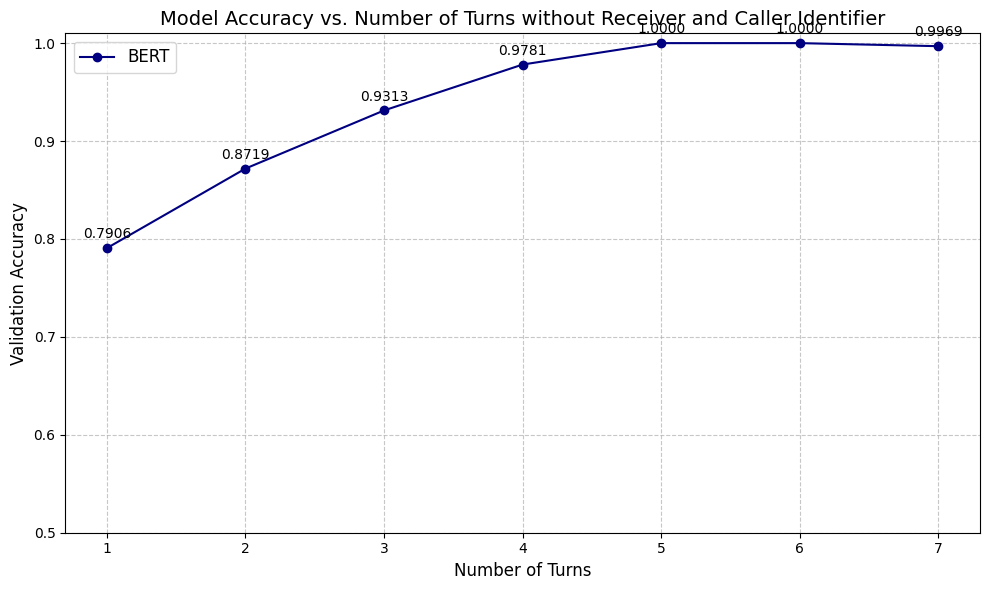

In [ ]:
from transformers import BertForSequenceClassification
import torch

model = BertForSequenceClassification.from_pretrained("BothBosu/bert-suspect-dialogue-scam-classifier-v1.0")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

import matplotlib.pyplot as plt

# Create a list to store the accuracies
BERT_accuracies = []

for df in test_dfs:
    accuracy = evaluate_model(model, df, device)
    BERT_accuracies.append(accuracy['accuracy'])

# Plot the model accuracy graph
turns = range(1, 1 + len(BERT_accuracies))

plt.figure(figsize=(10, 6))
plt.plot(turns, BERT_accuracies, marker='o', linestyle='-', color='navy', label='BERT')

plt.xlabel('Number of Turns', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
plt.title('Model Accuracy vs. Number of Turns without Receiver and Caller Identifier', fontsize=14)

plt.xticks(turns)
plt.ylim(0.5, 1.01)
plt.grid(True, linestyle='--', alpha=0.7)

for i, acc in enumerate(BERT_accuracies):
    plt.text(turns[i], acc + 0.01, f'{acc:.4f}', fontsize=10, ha='center')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
from torch.utils.data import DataLoader

test_df_1turn = test_df.copy()
test_df_1turn['dialogue'] = test_df_1turn['dialogue'].apply(lambda x: truncate_dialogue(x, 1))
test_df_1turn = count_turns(test_df_1turn)

test_df_2turn = test_df.copy()
test_df_2turn['dialogue'] = test_df_2turn['dialogue'].apply(lambda x: truncate_dialogue(x, 2))
test_df_2turn = count_turns(test_df_2turn)

test_df_3turn = test_df.copy()
test_df_3turn['dialogue'] = test_df_3turn['dialogue'].apply(lambda x: truncate_dialogue(x, 3))
test_df_3turn = count_turns(test_df_3turn)

test_df_4turn = test_df.copy()
test_df_4turn['dialogue'] = test_df_4turn['dialogue'].apply(lambda x: truncate_dialogue(x, 4))
test_df_4turn = count_turns(test_df_4turn)

test_df_5turn = test_df.copy()
test_df_5turn['dialogue'] = test_df_5turn['dialogue'].apply(lambda x: truncate_dialogue(x, 5))
test_df_5turn = count_turns(test_df_5turn)

test_df_6turn = test_df.copy()
test_df_6turn['dialogue'] = test_df_6turn['dialogue'].apply(lambda x: truncate_dialogue(x, 6))
test_df_6turn = count_turns(test_df_6turn)

test_df_7turn = test_df.copy()
test_df_7turn['dialogue'] = test_df_7turn['dialogue'].apply(lambda x: truncate_dialogue(x, 7))
test_df_7turn = count_turns(test_df_7turn)

test_df_1turn['dialogue'] = test_df_1turn['dialogue'].apply(filter_suspect_identifier)
test_df_2turn['dialogue'] = test_df_2turn['dialogue'].apply(filter_suspect_identifier)
test_df_3turn['dialogue'] = test_df_3turn['dialogue'].apply(filter_suspect_identifier)
test_df_4turn['dialogue'] = test_df_4turn['dialogue'].apply(filter_suspect_identifier)
test_df_5turn['dialogue'] = test_df_5turn['dialogue'].apply(filter_suspect_identifier)
test_df_6turn['dialogue'] = test_df_6turn['dialogue'].apply(filter_suspect_identifier)
test_df_7turn['dialogue'] = test_df_7turn['dialogue'].apply(filter_suspect_identifier)

test_df_1turn = Dataset.from_pandas(test_df_1turn)
test_df_1turn = test_df_1turn.map(tokenize, batched=True)
test_df_1turn.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
val_loader_1turn = DataLoader(test_df_1turn, batch_size=16, shuffle=False, collate_fn=data_collator)

test_df_2turn = Dataset.from_pandas(test_df_2turn)
test_df_2turn = test_df_2turn.map(tokenize, batched=True)
test_df_2turn.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
val_loader_2turn = DataLoader(test_df_2turn, batch_size=16, shuffle=False, collate_fn=data_collator)

test_df_3turn = Dataset.from_pandas(test_df_3turn)
test_df_3turn = test_df_3turn.map(tokenize, batched=True)
test_df_3turn.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
val_loader_3turn = DataLoader(test_df_3turn, batch_size=16, shuffle=False, collate_fn=data_collator)

test_df_4turn = Dataset.from_pandas(test_df_4turn)
test_df_4turn = test_df_4turn.map(tokenize, batched=True)
test_df_4turn.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
val_loader_4turn = DataLoader(test_df_4turn, batch_size=16, shuffle=False, collate_fn=data_collator)

test_df_5turn = Dataset.from_pandas(test_df_5turn)
test_df_5turn = test_df_5turn.map(tokenize, batched=True)
test_df_5turn.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
val_loader_5turn = DataLoader(test_df_5turn, batch_size=16, shuffle=False, collate_fn=data_collator)

test_df_6turn = Dataset.from_pandas(test_df_6turn)
test_df_6turn = test_df_6turn.map(tokenize, batched=True)
test_df_6turn.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
val_loader_6turn = DataLoader(test_df_6turn, batch_size=16, shuffle=False, collate_fn=data_collator)

test_df_7turn = Dataset.from_pandas(test_df_7turn)
test_df_7turn = test_df_7turn.map(tokenize, batched=True)
test_df_7turn.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
val_loader_7turn = DataLoader(test_df_7turn, batch_size=16, shuffle=False, collate_fn=data_collator)

Map:   0%|          | 0/320 [00:00<?, ? examples/s]

Map:   0%|          | 0/320 [00:00<?, ? examples/s]

Map:   0%|          | 0/320 [00:00<?, ? examples/s]

Map:   0%|          | 0/320 [00:00<?, ? examples/s]

Map:   0%|          | 0/320 [00:00<?, ? examples/s]

Map:   0%|          | 0/320 [00:00<?, ? examples/s]

Map:   0%|          | 0/320 [00:00<?, ? examples/s]

In [ ]:
def evaluate_model(model, val_loader, device):
    true_labels = []
    predicted_labels = []

    model.eval()
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch["input_ids"].to(device)
            labels = batch["labels"].to(device)

            outputs = model(input_ids)
            _, predicted = torch.max(outputs.data, 1)

            true_labels.extend(labels.cpu().numpy())
            predicted_labels.extend(predicted.cpu().numpy())

    accuracy = accuracy_score(true_labels, predicted_labels)
    return accuracy

# Evaluate the model on different val_loaders
val_loaders = [
    val_loader_1turn,
    val_loader_2turn,
    val_loader_3turn,
    val_loader_4turn,
    val_loader_5turn,
    val_loader_6turn,
    val_loader_7turn,
]

config.json:   0%|          | 0.00/128 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/132M [00:00<?, ?B/s]

Validation Accuracy (2 turns): 0.9656
Validation Accuracy (3 turns): 0.9844
Validation Accuracy (4 turns): 0.9875
Validation Accuracy (5 turns): 0.9969
Validation Accuracy (6 turns): 0.9938
Validation Accuracy (7 turns): 1.0000
Validation Accuracy (8 turns): 1.0000


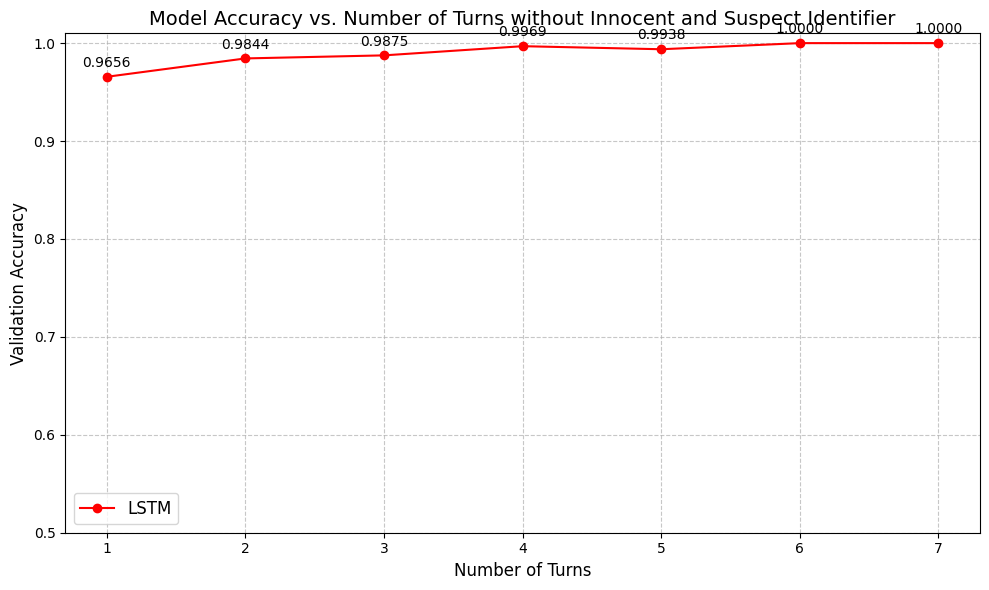

In [ ]:
import torch.nn as nn
from huggingface_hub import PyTorchModelHubMixin
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the LSTM model class
class LSTMClassifier(nn.Module, PyTorchModelHubMixin):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout, model_type="lstm"):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.lstm = nn.LSTM(hidden_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        embedded = self.embedding(x)
        output, _ = self.lstm(embedded)
        output = self.dropout(output[:, -1, :])
        output = self.fc(output)
        return output

model = LSTMClassifier.from_pretrained("BothBosu/lstm-Suspect-dialogue-scam-classifier-v1.0")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

import matplotlib.pyplot as plt

# Create a list to store the accuracies for the LSTM model
LSTM_accuracies = []

for i, val_loader in enumerate(val_loaders, start=2):
    accuracy = evaluate_model(model, val_loader, device)
    print(f"Validation Accuracy ({i} turns): {accuracy:.4f}")
    LSTM_accuracies.append(accuracy)

# Plot the model accuracy graph
turns = range(1, 1 + len(LSTM_accuracies))

plt.figure(figsize=(10, 6))
plt.plot(turns, LSTM_accuracies, marker='o', linestyle='-', color='red', label='LSTM')

plt.xlabel('Number of Turns', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
plt.title('Model Accuracy vs. Number of Turns without Innocent and Suspect Identifier', fontsize=14)

plt.xticks(turns)
plt.ylim(0.5, 1.01)
plt.grid(True, linestyle='--', alpha=0.7)

for i, acc in enumerate(LSTM_accuracies):
    plt.text(turns[i], acc + 0.01, f'{acc:.4f}', fontsize=10, ha='center')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

config.json:   0%|          | 0.00/104 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/188M [00:00<?, ?B/s]

Validation Accuracy (2 turns): 0.9187
Validation Accuracy (3 turns): 0.9563
Validation Accuracy (4 turns): 0.9844
Validation Accuracy (5 turns): 0.9844
Validation Accuracy (6 turns): 0.9938
Validation Accuracy (7 turns): 0.9906
Validation Accuracy (8 turns): 0.9938


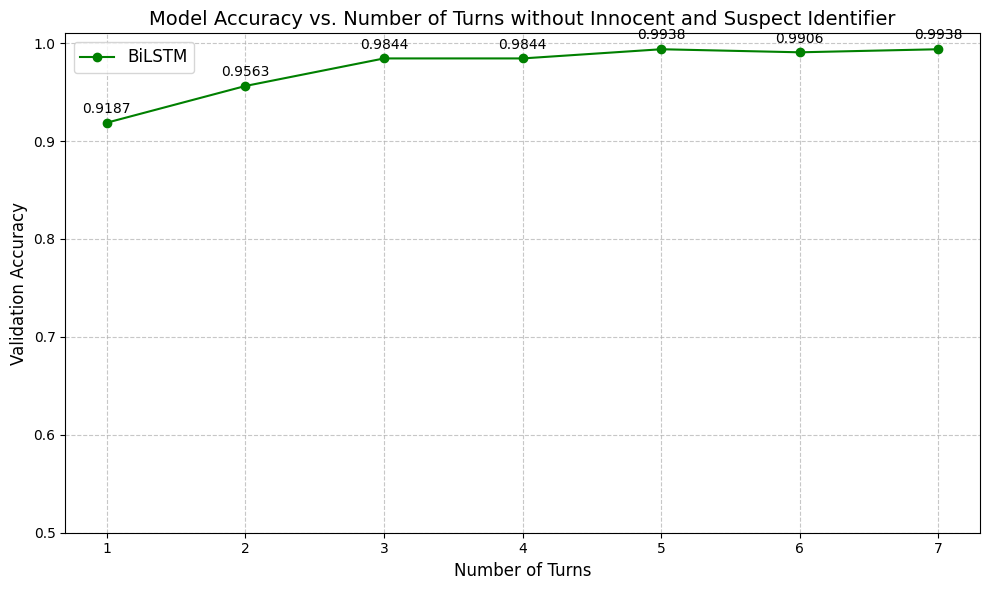

In [ ]:
from huggingface_hub import PyTorchModelHubMixin

# Define the LSTM model class
class BiLSTMClassifier(nn.Module, PyTorchModelHubMixin):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout):
        super(BiLSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.lstm = nn.LSTM(hidden_size, hidden_size, num_layers, batch_first=True, bidirectional=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size * 2, num_classes)  # Multiply hidden_size by 2 for BiLSTM
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        embedded = self.embedding(x)
        output, _ = self.lstm(embedded)
        output = self.dropout(output[:, -1, :])
        output = self.fc(output)
        return output

model = BiLSTMClassifier.from_pretrained("BothBosu/bilstm-suspect-dialogue-scam-classifier-v1.0")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

import matplotlib.pyplot as plt

# Create a list to store the accuracies for the BiLSTM model
BiLSTM_accuracies = []

for i, val_loader in enumerate(val_loaders, start=2):
    accuracy = evaluate_model(model, val_loader, device)
    print(f"Validation Accuracy ({i} turns): {accuracy:.4f}")
    BiLSTM_accuracies.append(accuracy)

# Plot the model accuracy graph
turns = range(1, 1 + len(BiLSTM_accuracies))

plt.figure(figsize=(10, 6))
plt.plot(turns, BiLSTM_accuracies, marker='o', linestyle='-', color='green', label='BiLSTM')

plt.xlabel('Number of Turns', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
plt.title('Model Accuracy vs. Number of Turns without Innocent and Suspect Identifier', fontsize=14)

plt.xticks(turns)
plt.ylim(0.5, 1.01)  # Set the y-axis limits starting from 0.5
plt.grid(True, linestyle='--', alpha=0.7)

for i, acc in enumerate(BiLSTM_accuracies):
    plt.text(turns[i], acc + 0.01, f'{acc:.4f}', fontsize=10, ha='center')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

config.json:   0%|          | 0.00/104 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/122M [00:00<?, ?B/s]

Validation Accuracy (2 turns): 0.9531
Validation Accuracy (3 turns): 0.9844
Validation Accuracy (4 turns): 0.9906
Validation Accuracy (5 turns): 0.9906
Validation Accuracy (6 turns): 0.9938
Validation Accuracy (7 turns): 1.0000
Validation Accuracy (8 turns): 1.0000


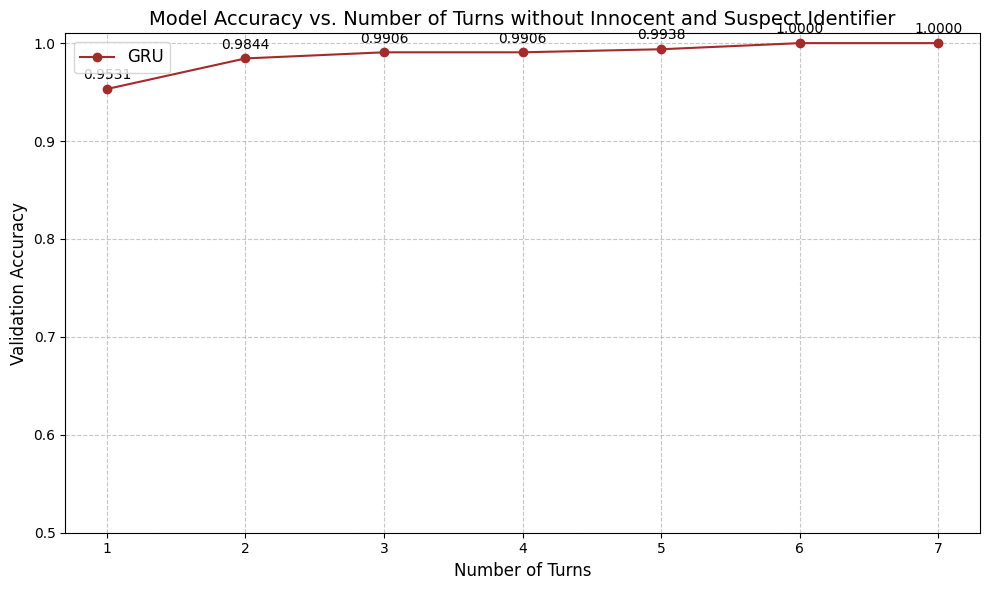

In [ ]:
from huggingface_hub import PyTorchModelHubMixin

# Define the GRU model class
class GRUClassifier(nn.Module, PyTorchModelHubMixin):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout):
        super(GRUClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        embedded = self.embedding(x)
        output, _ = self.gru(embedded)
        output = self.dropout(output[:, -1, :])
        output = self.fc(output)
        return output

model = GRUClassifier.from_pretrained("BothBosu/gru-suspect-dialogue-scam-classifier-v1.0")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

import matplotlib.pyplot as plt

# Create a list to store the accuracies for the GRU model
GRU_accuracies = []

for i, val_loader in enumerate(val_loaders, start=2):
    accuracy = evaluate_model(model, val_loader, device)
    print(f"Validation Accuracy ({i} turns): {accuracy:.4f}")
    GRU_accuracies.append(accuracy)

# Plot the model accuracy graph
turns = range(1, 1 + len(GRU_accuracies))

plt.figure(figsize=(10, 6))
plt.plot(turns, GRU_accuracies, marker='o', linestyle='-', color='brown', label='GRU')

plt.xlabel('Number of Turns', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
plt.title('Model Accuracy vs. Number of Turns without Innocent and Suspect Identifier', fontsize=14)

plt.xticks(turns)
plt.ylim(0.5, 1.01)  # Set the y-axis limits starting from 0.5
plt.grid(True, linestyle='--', alpha=0.7)

for i, acc in enumerate(GRU_accuracies):
    plt.text(turns[i], acc + 0.01, f'{acc:.4f}', fontsize=10, ha='center')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

config.json:   0%|          | 0.00/104 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/165M [00:00<?, ?B/s]

Validation Accuracy (2 turns): 0.8438
Validation Accuracy (3 turns): 0.9969
Validation Accuracy (4 turns): 1.0000
Validation Accuracy (5 turns): 1.0000
Validation Accuracy (6 turns): 1.0000
Validation Accuracy (7 turns): 1.0000
Validation Accuracy (8 turns): 1.0000


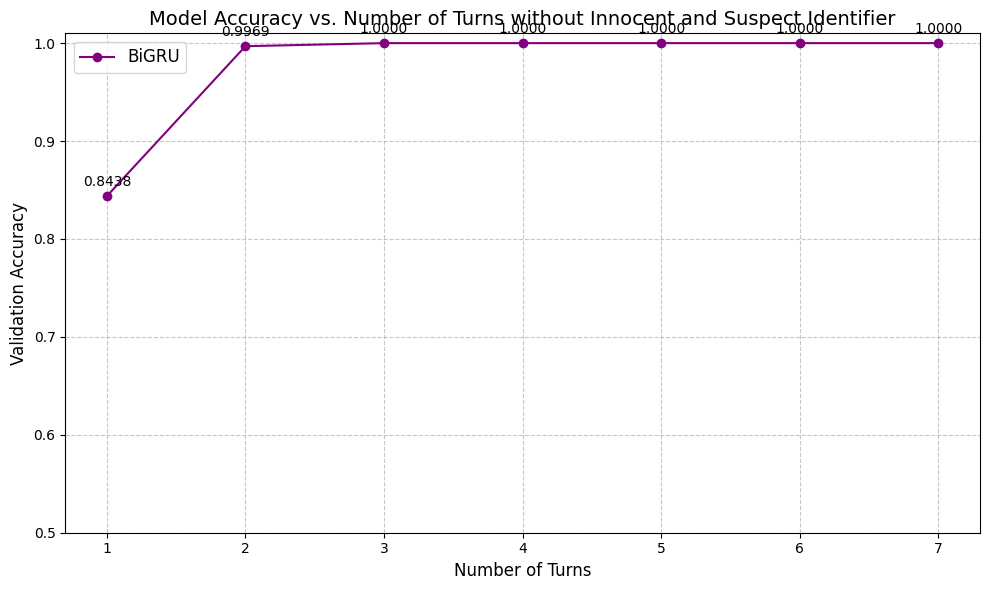

In [ ]:
from huggingface_hub import PyTorchModelHubMixin

# Define the BiGRU model class
class BiGRUClassifier(nn.Module, PyTorchModelHubMixin):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout):
        super(BiGRUClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size, num_layers, batch_first=True, bidirectional=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size * 2, num_classes)  # Multiply hidden_size by 2 for BiGRU
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        embedded = self.embedding(x)
        output, _ = self.gru(embedded)
        output = self.dropout(output[:, -1, :])
        output = self.fc(output)
        return output

model = BiGRUClassifier.from_pretrained("BothBosu/bigru-suspect-dialogue-scam-classifier-v1.0")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

import matplotlib.pyplot as plt

# Create a list to store the accuracies for the BiGRU model
BiGRU_accuracies = []

for i, val_loader in enumerate(val_loaders, start=2):
    accuracy = evaluate_model(model, val_loader, device)
    print(f"Validation Accuracy ({i} turns): {accuracy:.4f}")
    BiGRU_accuracies.append(accuracy)

# Plot the model accuracy graph
turns = range(1, 1 + len(BiGRU_accuracies))

plt.figure(figsize=(10, 6))
plt.plot(turns, BiGRU_accuracies, marker='o', linestyle='-', color='purple', label='BiGRU')

plt.xlabel('Number of Turns', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
plt.title('Model Accuracy vs. Number of Turns without Innocent and Suspect Identifier', fontsize=14)

plt.xticks(turns)
plt.ylim(0.5, 1.01)  # Set the y-axis limits starting from 0.5
plt.grid(True, linestyle='--', alpha=0.7)

for i, acc in enumerate(BiGRU_accuracies):
    plt.text(turns[i], acc + 0.01, f'{acc:.4f}', fontsize=10, ha='center')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

config.json:   0%|          | 0.00/154 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/16.4M [00:00<?, ?B/s]

Validation Accuracy (2 turns): 0.8656
Validation Accuracy (3 turns): 0.9281
Validation Accuracy (4 turns): 1.0000
Validation Accuracy (5 turns): 1.0000
Validation Accuracy (6 turns): 1.0000
Validation Accuracy (7 turns): 1.0000
Validation Accuracy (8 turns): 1.0000


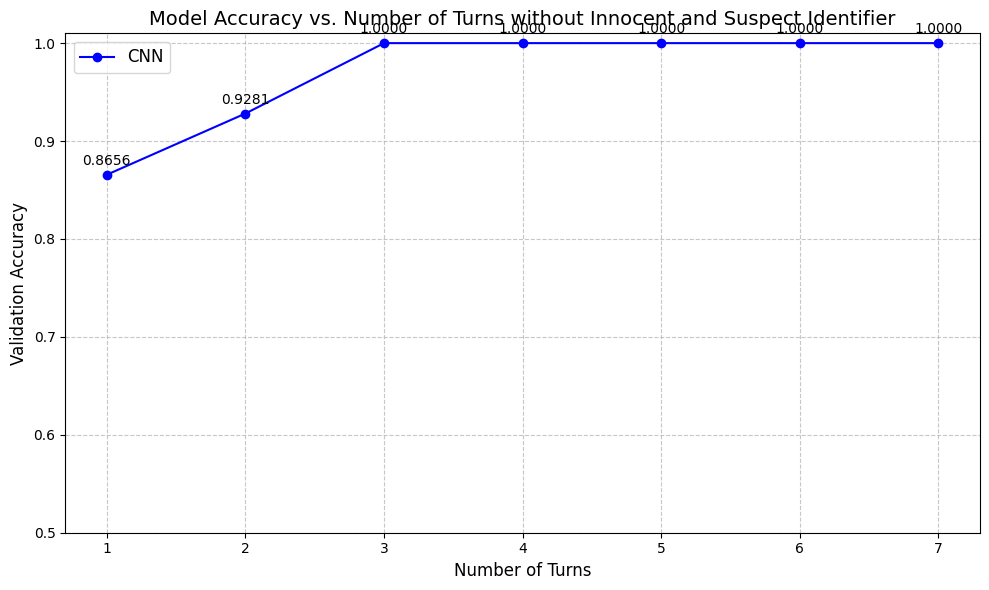

In [ ]:
from huggingface_hub import PyTorchModelHubMixin
import torch.nn.functional as F

# Define the CNN model class
class CNNClassifier(nn.Module, PyTorchModelHubMixin):
    def __init__(self, vocab_size, embedding_dim, num_filters, filter_sizes, num_classes, dropout):
        super(CNNClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.convs = nn.ModuleList([
            nn.Conv1d(in_channels=embedding_dim, out_channels=num_filters, kernel_size=fs) for fs in filter_sizes
        ])
        self.fc = nn.Linear(len(filter_sizes) * num_filters, num_classes)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        embedded = self.embedding(x)
        embedded = embedded.permute(0, 2, 1)
        conved = [F.relu(conv(embedded)) for conv in self.convs]
        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]
        cat = self.dropout(torch.cat(pooled, dim=1))
        output = self.fc(cat)
        return output


model = CNNClassifier.from_pretrained("BothBosu/cnn-suspect-dialogue-scam-classifier-v1.0")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Create a list to store the accuracies
CNN_accuracies = []

for i, val_loader in enumerate(val_loaders, start=2):
    accuracy = evaluate_model(model, val_loader, device)
    print(f"Validation Accuracy ({i} turns): {accuracy:.4f}")
    CNN_accuracies.append(accuracy)

# Plot the model accuracy graph
turns = range(1, 1 + len(CNN_accuracies))

plt.figure(figsize=(10, 6))
plt.plot(turns, CNN_accuracies, marker='o', linestyle='-', color='blue', label='CNN')

plt.xlabel('Number of Turns', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
plt.title('Model Accuracy vs. Number of Turns without Innocent and Suspect Identifier', fontsize=14)

plt.xticks(turns)
plt.ylim(0.5, 1.01)
plt.grid(True, linestyle='--', alpha=0.7)

for i, acc in enumerate(CNN_accuracies):
    plt.text(turns[i], acc + 0.01, f'{acc:.4f}', fontsize=10, ha='center')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

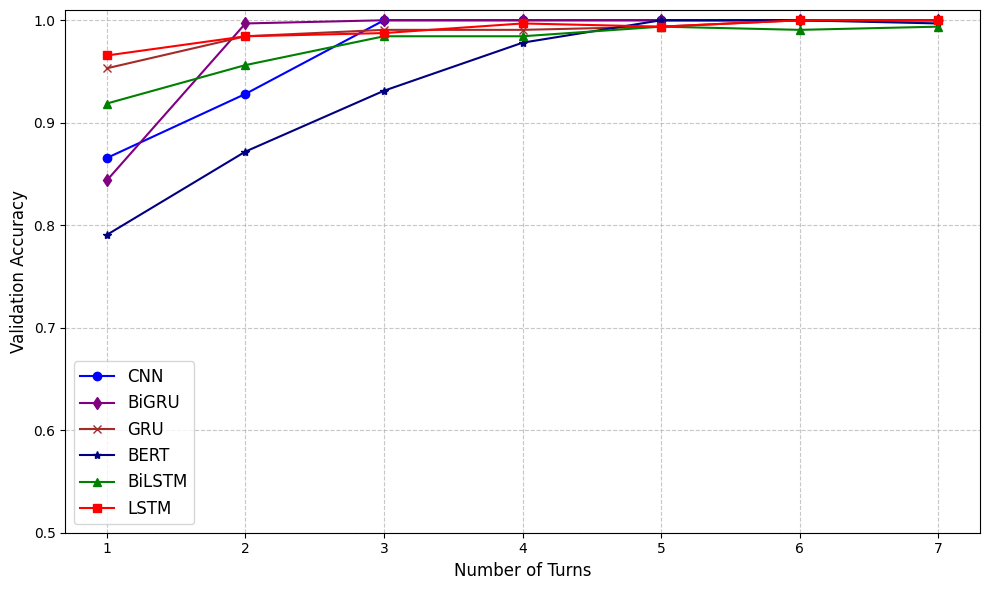

In [ ]:
import matplotlib.pyplot as plt

# Plot the model accuracy graph
turns = range(1, 1 + len(CNN_accuracies))

plt.figure(figsize=(10, 6))

plt.plot(turns, CNN_accuracies, marker='o', linestyle='-', color='blue', label='CNN')
plt.plot(turns, BiGRU_accuracies, marker='d', linestyle='-', color='purple', label='BiGRU')
plt.plot(turns, GRU_accuracies, marker='x', linestyle='-', color='brown', label='GRU')
plt.plot(turns, BERT_accuracies, marker='*', linestyle='-', color='navy', label='BERT')
plt.plot(turns, BiLSTM_accuracies, marker='^', linestyle='-', color='green', label='BiLSTM')
plt.plot(turns, LSTM_accuracies, marker='s', linestyle='-', color='red', label='LSTM')

plt.xlabel('Number of Turns', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
# plt.title('Model Accuracy vs. Number of Turns with only Suspect (Single-Agent Datset)', fontsize=14)

plt.xticks(turns)
plt.ylim(0.5, 1.01)  # Set the y-axis limits starting from 0.5
plt.grid(True, linestyle='--', alpha=0.7)

# Add a legend
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()